In [2]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# Add the scripts folder to the system path so we can import time_series.py
import sys
import os
from scipy.stats import zscore
# for a folder that contain scripts for modularity 
sys.path.append(os.path.abspath('../scripts'))
sys.path.append(os.path.abspath('../src')) 
from data_loader import FileLoader
from path import FilePathManager
from eda import EDA

In [3]:
# Create an instance of the class
file_manager = FilePathManager()

# Retrieve the file paths
file_paths = file_manager.get_file_paths()
file_name = file_manager.get_file_name()

# Initialize the loader with the file paths
loader = FileLoader(file_paths)

# Load all files
loader.load_files()

# Access individual DataFrames by file name
df = loader.get_dataframe(file_name[0])
df_desc = loader.get_dataframe(file_name[1])

In [3]:
df_desc

Fields  \
0                                  bearer id   
1                                  Dur. (ms)   
2                                      Start   
3                                   Start ms   
4                                        End   
5                                     End ms   
6                                   Dur. (s)   
7                                       IMSI   
8                              MSISDN/Number   
9                                       IMEI   
10                        Last Location Name   
11                           Avg RTT DL (ms)   
12                           Avg RTT UL (ms)   
13                   Avg Bearer TP DL (kbps)   
14                   Avg Bearer TP UL (kbps)   
15               TCP DL Retrans. Vol (Bytes)   
16               TCP UL Retrans. Vol (Bytes)   
17                       DL TP < 50 Kbps (%)   
18            50 Kbps < DL TP < 250 Kbps (%)   
19             250 Kbps < DL TP < 1 Mbps (%)   
20                        DL TP > 1 Mbps (%)   
21                       UL TP < 10 Kbps (%)   
22             10 Kbps < UL TP < 50 Kbps (%)   
23            50 Kbps < UL TP < 300 Kbps (%)   
24                      UL TP > 300 Kbps (%)   
25                           HTTP DL (Bytes)   
26                           HTTP UL (Bytes)   
27                 Activity Duration DL (ms)   
28                 Activity Duration UL (ms)   
29                               Dur. (ms).1   
30                      Handset Manufacturer   
31                              Handset Type   
32           Nb of sec with 125000B < Vol DL   
33     Nb of sec with 1250B < Vol UL < 6250B   
34  Nb of sec with 31250B < Vol DL < 125000B   
35            Nb of sec with 37500B < Vol UL   
36    Nb of sec with 6250B < Vol DL < 31250B   
37    Nb of sec with 6250B < Vol UL < 37500B   
38             Nb of sec with Vol DL < 6250B   
39             Nb of sec with Vol UL < 1250B   
40                   Social Media DL (Bytes)   
41                   Social Media UL (Bytes)   
42                        YouTube DL (Bytes)   
43                        YouTube UL (Bytes)   
44                        Netflix DL (Bytes)   
45                        Netflix UL (Bytes)   
46                         Google DL (Bytes)   
47                         Google UL (Bytes)   
48                          Email DL (Bytes)   
49                          Email UL (Bytes)   
50                         Gaming DL (Bytes)   
51                         Gaming UL (Bytes)   
52                                  Other DL   
53                                  Other UL   
54                          Total DL (Bytes)   
55                          Total UL (Bytes)   

                                          Description  
0                              xDr session identifier  
1                   Total Duration of the xDR (in ms)  
2       Start time of the xDR (first frame timestamp)  
3   Milliseconds offset of start time for the xDR ...  
4          End time of the xDR (last frame timestamp)  
5   Milliseconds offset of end time of the xDR (la...  
6                    Total Duration of the xDR (in s)  
7            International Mobile Subscriber Identity  
8   MS International PSTN/ISDN Number of mobile - ...  
9             International Mobile Equipment Identity  
10  User location call name (2G/3G/4G) at the end ...  
11  Average Round Trip Time measurement Downlink d...  
12  Average Round Trip Time measurement Uplink dir...  
13  Average Bearer Throughput for Downlink (kbps) ...  
14  Average Bearer Throughput for uplink (kbps) - ...  
15  TCP volume of Downlink packets detected as ret...  
16  TCP volume of Uplink packets detected as retra...  
17  Duration ratio when Bearer Downlink Throughput...  
18  Duration ratio when Bearer Downlink Throughput...  
19  Duration ratio when Bearer Downlink Throughput...  
20  Duration ratio when Bearer Downlink Throughput...  
21  Duration ratio when Bearer Uplink Throughput < ….  
22  Duration 

In [4]:
# Create an instance of the EDA class
eda = EDA(df)

# Display the top 5 rows
top_n = eda.display_top_n(5)
top_n

Bearer Id            Start  Start ms              End  End ms  \
0  1.311448e+19   4/4/2019 12:01     770.0  4/25/2019 14:35   662.0   
1  1.311448e+19   4/9/2019 13:04     235.0   4/25/2019 8:15   606.0   
2  1.311448e+19   4/9/2019 17:42       1.0  4/25/2019 11:58   652.0   
3  1.311448e+19   4/10/2019 0:31     486.0   4/25/2019 7:36   171.0   
4  1.311448e+19  4/12/2019 20:10     565.0  4/25/2019 10:40   954.0   

   Dur. (ms)          IMSI  MSISDN/Number          IMEI  \
0  1823652.0  2.082014e+14   3.366496e+10  3.552121e+13   
1  1365104.0  2.082019e+14   3.368185e+10  3.579401e+13   
2  1361762.0  2.082003e+14   3.376063e+10  3.528151e+13   
3  1321509.0  2.082014e+14   3.375034e+10  3.535661e+13   
4  1089009.0  2.082014e+14   3.369980e+10  3.540701e+13   

      Last Location Name  ...  Youtube DL (Bytes)  Youtube UL (Bytes)  \
0  9.16456699548519E+015  ...          15854611.0           2501332.0   
1                L77566A  ...          20247395.0          19111729.0   
2                D42335A  ...          19725661.0          14699576.0   
3                T21824A  ...          21388122.0          15146643.0   
4                D88865A  ...          15259380.0          18962873.0   

   Netflix DL (Bytes)  Netflix UL (Bytes)  Gaming DL (Bytes)  \
0           8198936.0           9656251.0        278082303.0   
1          18338413.0          17227132.0        608750074.0   
2          17587794.0           6163408.0        229584621.0   
3          13994646.0           1097942.0        799538153.0   
4          17124581.0            415218.0        527707248.0   

   Gaming UL (Bytes)  Other DL (Bytes)  Other UL (Bytes)  Total UL (Bytes)  \
0         14344150.0       171744450.0         8814393.0        36749741.0   
1          1170709.0       526904238.0        15055145.0        53800391.0   
2           395630.0       410692588.0         4215763.0        27883638.0   
3         10849722.0       749039933.0        12797283.0        43324218.0   
4          3529801.0       550709500.0        13910322.0        38542814.0   

   Total DL (Bytes)  
0       308879636.0  
1       653384965.0  
2       279807335.0  
3       846028530.0  
4       569138589.0  

[5 rows x 55 columns]

In [6]:
# Display dataset info
eda.display_info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150001 entries, 0 to 150000
Data columns (total 55 columns):
 #   Column                                    Non-Null Count   Dtype  
---  ------                                    --------------   -----  
 0   Bearer Id                                 149010 non-null  float64
 1   Start                                     150000 non-null  object 
 2   Start ms                                  150000 non-null  float64
 3   End                                       150000 non-null  object 
 4   End ms                                    150000 non-null  float64
 5   Dur. (ms)                                 150000 non-null  float64
 6   IMSI                                      149431 non-null  float64
 7   MSISDN/Number                             148935 non-null  float64
 8   IMEI                                      149429 non-null  float64
 9   Last Location Name                        148848 non-null  object 
 10  Avg RTT DL (ms)     

In [6]:
# Display statistical description
eda.display_description()

count          mean  \
Bearer Id                                 149010.0  1.013887e+19   
Start ms                                  150000.0  4.991882e+02   
End ms                                    150000.0  4.988009e+02   
Dur. (ms)                                 150000.0  1.046086e+05   
IMSI                                      149431.0  2.082016e+14   
MSISDN/Number                             148935.0  4.188282e+10   
IMEI                                      149429.0  4.847455e+13   
Avg RTT DL (ms)                           122172.0  1.097957e+02   
Avg RTT UL (ms)                           122189.0  1.766288e+01   
Avg Bearer TP DL (kbps)                   150000.0  1.330005e+04   
Avg Bearer TP UL (kbps)                   150000.0  1.770429e+03   
TCP DL Retrans. Vol (Bytes)                61855.0  2.080991e+07   
TCP UL Retrans. Vol (Bytes)                53352.0  7.596587e+05   
DL TP < 50 Kbps (%)                       149247.0  9.284475e+01   
50 Kbps < DL TP < 250 Kbps (%)            149247.0  3.069355e+00   
250 Kbps < DL TP < 1 Mbps (%)             149247.0  1.717341e+00   
DL TP > 1 Mbps (%)                        149247.0  1.609654e+00   
UL TP < 10 Kbps (%)                       149209.0  9.853014e+01   
10 Kbps < UL TP < 50 Kbps (%)             149209.0  7.767494e-01   
50 Kbps < UL TP < 300 Kbps (%)            149209.0  1.479871e-01   
UL TP > 300 Kbps (%)                      149209.0  7.892285e-02   
HTTP DL (Bytes)                            68527.0  1.144710e+08   
HTTP UL (Bytes)                            68191.0  3.242301e+06   
Activity Duration DL (ms)                 150000.0  1.829177e+06   
Activity Duration UL (ms)                 150000.0  1.408880e+06   
Dur. (ms).1                               150000.0  1.046091e+08   
Nb of sec with 125000B < Vol DL            52463.0  9.897000e+02   
Nb of sec with 1250B < Vol UL < 6250B      57107.0  3.404344e+02   
Nb of sec with 31250B < Vol DL < 125000B   56415.0  8.108374e+02   
Nb of sec with 37500B < Vol UL             19747.0  1.492571e+02   
Nb of sec with 6250B < Vol DL < 31250B     61684.0  9.654648e+02   
Nb of sec with 6250B < Vol UL < 37500B     38158.0  1.413048e+02   
Nb of sec with Vol DL < 6250B             149246.0  3.719788e+03   
Nb of sec with Vol UL < 1250B             149208.0  4.022083e+03   
Social Media DL (Bytes)                   150001.0  1.795322e+06   
Social Media UL (Bytes)                   150001.0  3.292843e+04   
Google DL (Bytes)                         150001.0  5.750753e+06   
Google UL (Bytes)                         150001.0  2.056542e+06   
Email DL (Bytes)                          150001.0  1.791729e+06   
Email UL (Bytes)                          150001.0  4.673734e+05   
Youtube DL (Bytes)                        150001.0  1.163407e+07   
Youtube UL (Bytes)                        150001.0  1.100941e+07   
Netflix DL (Bytes)                        150001.0  1.162685e+07   
Netflix UL (Bytes)                        150001.0  1.100175e+07   
Gaming DL (Bytes)                         150001.0  4.220447e+08   
Gaming UL (Bytes)                         150001.0  8.288398e+06   
Other DL (Bytes)                          150001.0  4.211005e+08   
Other UL (Bytes)                          150001.0  8.264799e+06   
Total UL (Bytes)                          150000.0  4.112121e+07   
Total DL (Bytes)                          150000.0  4.546434e+08   

                                                   std           min  \
Bearer Id                                 2.893173e+18  6.917538e+18   
Start ms                                  2.886118e+02  0.000000e+00   
End ms                                    2.880977e+02  0.000000e+00   
Dur. (ms)                                 8.103762e+04  7.142000e+03   
IMSI                                      2.148809e+10  2.040471e+14   
MSISDN/Number                             2.447443e+12  3.360100e+10   
IMEI                                      2.241637e+13  4.400152e+11   


In [138]:
# Check for null values
eda.check_null_values()

Bearer Id                                      991
Start                                            1
Start ms                                         1
End                                              1
End ms                                           1
Dur. (ms)                                        1
IMSI                                           570
MSISDN/Number                                 1066
IMEI                                           572
Last Location Name                            1153
Avg RTT DL (ms)                              27829
Avg RTT UL (ms)                              27812
Avg Bearer TP DL (kbps)                          1
Avg Bearer TP UL (kbps)                          1
TCP DL Retrans. Vol (Bytes)                  88146
TCP UL Retrans. Vol (Bytes)                  96649
DL TP < 50 Kbps (%)                            754
50 Kbps < DL TP < 250 Kbps (%)                 754
250 Kbps < DL TP < 1 Mbps (%)                  754
DL TP > 1 Mbps (%)             

### Here is the code that checks columns that have very small missing values 

In [5]:
# Find columns with null values greater than 0 and less than 3
columns_with_few_nulls = df.columns[(df.isnull().sum() < 3) & (df.isnull().sum() > 0)]
print(f"Total Number of culumns that have missing value < 3 but not 0 is equal to: {len(columns_with_few_nulls)}")
df[df[columns_with_few_nulls].isna().any(axis = 1)]

Total Number of culumns that have missing value < 3 but not 0 is equal to: 12


Bearer Id Start  Start ms  End  End ms  Dur. (ms)  IMSI  \
150000        NaN   NaN       NaN  NaN     NaN        NaN   NaN   

        MSISDN/Number  IMEI Last Location Name  ...  Youtube DL (Bytes)  \
150000            NaN   NaN                NaN  ...        1.163407e+07   

        Youtube UL (Bytes)  Netflix DL (Bytes)  Netflix UL (Bytes)  \
150000        1.100941e+07        1.162685e+07        1.100175e+07   

        Gaming DL (Bytes)  Gaming UL (Bytes)  Other DL (Bytes)  \
150000       4.220447e+08       8.288398e+06      4.211005e+08   

        Other UL (Bytes)  Total UL (Bytes)  Total DL (Bytes)  
150000      8.264799e+06               NaN               NaN  

[1 rows x 55 columns]

#### When I observe it must of the records are miss so inputing these value has no siginificance so I will drop those rows 

In [6]:
df.dropna(subset=columns_with_few_nulls, inplace=True)

#### To Verify it

In [7]:
df.isna().sum()

Bearer Id                                      990
Start                                            0
Start ms                                         0
End                                              0
End ms                                           0
Dur. (ms)                                        0
IMSI                                           569
MSISDN/Number                                 1065
IMEI                                           571
Last Location Name                            1152
Avg RTT DL (ms)                              27828
Avg RTT UL (ms)                              27811
Avg Bearer TP DL (kbps)                          0
Avg Bearer TP UL (kbps)                          0
TCP DL Retrans. Vol (Bytes)                  88145
TCP UL Retrans. Vol (Bytes)                  96648
DL TP < 50 Kbps (%)                            753
50 Kbps < DL TP < 250 Kbps (%)                 753
250 Kbps < DL TP < 1 Mbps (%)                  753
DL TP > 1 Mbps (%)             

#### Now also when I observe Null value the first column which is uniquly identifies the records that I couldn't replace with any value, so I deciede to drop that column missing value rows too

In [8]:
df.dropna(subset=['Bearer Id'], inplace=True)
null_columns_greater_than_2 =  df.columns[(df.isnull().sum() > 0)]
print(f"I have {len(null_columns_greater_than_2)} columns that Have missing value greater than 2")

I have 28 columns that Have missing value greater than 2


In [9]:
df[null_columns_greater_than_2].isna().sum()

IMSI                                             9
MSISDN/Number                                  504
IMEI                                            11
Last Location Name                             162
Avg RTT DL (ms)                              27685
Avg RTT UL (ms)                              27666
TCP DL Retrans. Vol (Bytes)                  87906
TCP UL Retrans. Vol (Bytes)                  96368
DL TP < 50 Kbps (%)                            716
50 Kbps < DL TP < 250 Kbps (%)                 716
250 Kbps < DL TP < 1 Mbps (%)                  716
DL TP > 1 Mbps (%)                             716
UL TP < 10 Kbps (%)                            770
10 Kbps < UL TP < 50 Kbps (%)                  770
50 Kbps < UL TP < 300 Kbps (%)                 770
UL TP > 300 Kbps (%)                           770
HTTP DL (Bytes)                              81228
HTTP UL (Bytes)                              81578
Handset Manufacturer                            11
Handset Type                   

In [123]:
df[null_columns_greater_than_2][df[null_columns_greater_than_2].isna().any(axis = 1)].shape

(131452, 28)

In [154]:
# Find rows where null values exist in the specified columns and in the 'x_column'
filtered_rows = df[df[null_columns_greater_than_2].isnull().any(axis=1) & df['IMSI'].isnull()]
filtered_rows2 = df[df[null_columns_greater_than_2].isnull().any(axis=1) & df['IMEI'].isnull()]
# Display the filtered rows
filtered_rows2


Bearer Id            Start  Start ms              End  End ms  \
21832   6.917538e+18  4/24/2019 20:26     736.0   4/25/2019 0:14     1.0   
24413   6.917538e+18  4/24/2019 20:58     125.0  4/24/2019 23:35   994.0   
24802   1.268214e+19  4/24/2019 21:02     478.0   4/25/2019 2:55   997.0   
58263   6.917538e+18  4/25/2019 23:05     714.0  4/26/2019 23:11    12.0   
79882   6.917538e+18   4/27/2019 7:44     593.0  4/27/2019 23:11   529.0   
89902   6.917538e+18  4/27/2019 14:12     749.0   4/28/2019 4:59   548.0   
91249   6.917538e+18  4/27/2019 14:45      42.0   4/28/2019 3:25   936.0   
116576  1.268214e+19   4/28/2019 1:34      98.0   4/29/2019 1:27   862.0   
140112  6.917538e+18   4/29/2019 3:21     626.0   4/30/2019 2:56   432.0   
141184  6.917538e+18   4/29/2019 3:56     245.0   4/30/2019 1:25   329.0   
145353  1.268214e+19   4/29/2019 6:06     463.0   4/30/2019 6:06   466.0   

        Dur. (ms)          IMSI  MSISDN/Number  IMEI Last Location Name  ...  \
21832     13666.0           NaN            NaN   NaN            U14936A  ...   
24413      9460.0           NaN            NaN   NaN            G56560A  ...   
24802     21231.0           NaN            NaN   NaN            G15451C  ...   
58263     86782.0  2.082095e+14            NaN   NaN            U74261B  ...   
79882     55575.0  2.082095e+14            NaN   NaN            W21110C  ...   
89902     53166.0           NaN            NaN   NaN            G83959A  ...   
91249     45594.0           NaN            NaN   NaN            U85956A  ...   
116576    85999.0           NaN            NaN   NaN            V70710B  ...   
140112    84922.0           NaN            NaN   NaN            U73516A  ...   
141184    77313.0           NaN            NaN   NaN            U42171B  ...   
145353    86371.0           NaN            NaN   NaN            V77597B  ...   

        Youtube DL (Bytes)  Youtube UL (Bytes)  Netflix DL (Bytes)  \
21832           20747429.0          21022153.0           5246185.0   
24413            1712095.0           4735960.0           1849343.0   
24802            8077188.0          14218592.0           6581163.0   
58263            1215176.0           6041132.0           1418313.0   
79882           17202372.0          21288822.0          19270040.0   
89902           19555096.0          18356401.0          22998366.0   
91249           16915430.0          12855726.0          14508191.0   
116576            647961.0          13367183.0          13169294.0   
140112           4515779.0          10260059.0          11863799.0   
141184          19094432.0          17771961.0          20495181.0   
145353           8002890.0          13686058.0          15839616.0   

        Netflix UL (Bytes)  Gaming DL (Bytes)  Gaming UL (Bytes)  \
21832           17407945.0        812195002.0         13334794.0   
24413           13887683.0         54277434.0           694630.0   
24802            9334994.0        592935106.0          8662570.0   
58263            5665048.0        596717529.0          8854054.0   
79882            3265093.0         62871774.0         11659446.0   
89902            5954544.0        789043081.0          2146033.0   
91249           19752864.0        501514849.0          1942936.0   
116576          21395712.0        747309023.0         11095360.0   
140112           3643319.0         38470041.0         12809993.0   
141184           9063347.0        282473281.0          9427574.0   
145353          12320580.0        587372924.0          5915899.0   

        Other DL (Bytes)  Other UL (Bytes)  Total UL (Bytes)  Total DL (Bytes)  
21832        462764262.0         5997128.0        60679021.0       844371851.0  
24413        779382238.0         7240687.0        28222264.0        72444302.0  
24802         31148323.0        14575026.0        50670513.0       614648963.0  
58263        642690544.0        11469281.0        34369618.0       611874376.0  
79882        618554992.0        15807139.0        55218094.0       1067516

After I observe the result of IMSI, MSISDN, and IMEI missed rows since these are critical for my analysis and even there's no feasible way to impute the missing values reliably, I can follow a method like forward or backward fill or mode mechanism 
while the records those have missed value after remoming unreplacable rows it is not a significance number it is arround 9. As well when observe it I got three column values are missed so what I decied is removing rows with missing values the best option for this case too.

In [10]:
df.dropna(subset=['IMSI', 'IMEI', 'MSISDN/Number'], how='all', inplace=True)

In [11]:
null_columns_greater_than_0 =  df.columns[(df.isnull().sum() > 0)]
print(df[null_columns_greater_than_0].isna().sum().shape)
df[null_columns_greater_than_0].isna().sum()

(27,)


MSISDN/Number                                  495
IMEI                                             2
Last Location Name                             162
Avg RTT DL (ms)                              27685
Avg RTT UL (ms)                              27666
TCP DL Retrans. Vol (Bytes)                  87906
TCP UL Retrans. Vol (Bytes)                  96368
DL TP < 50 Kbps (%)                            716
50 Kbps < DL TP < 250 Kbps (%)                 716
250 Kbps < DL TP < 1 Mbps (%)                  716
DL TP > 1 Mbps (%)                             716
UL TP < 10 Kbps (%)                            770
10 Kbps < UL TP < 50 Kbps (%)                  770
50 Kbps < UL TP < 300 Kbps (%)                 770
UL TP > 300 Kbps (%)                           770
HTTP DL (Bytes)                              81228
HTTP UL (Bytes)                              81578
Handset Manufacturer                             2
Handset Type                                     2
Nb of sec with 125000B < Vol DL

In [164]:
# # Convert the column to a string format (without scientific notation)
# # # List of columns to apply the formatting to
# columns_to_format = ['IMSI', 'MSISDN/Number', 'IMEI']

# # Apply the formatting to each column in the list
# for column in columns_to_format:
#     df[column] = df[column].apply(lambda x: f'{x:.0f}')

In [13]:
# Find rows where IMSI has the same value as another row (including the first occurrence)
duplicate_rows = df[df['IMSI'].duplicated(keep=False)]

# Sort the duplicate rows in descending order (based on IMSI or another column)
duplicate_rows_sorted = duplicate_rows.sort_values(by='IMSI', ascending=False)
duplicate_rows_sorted.head(10)

Bearer Id           Start  Start ms              End  End ms  \
922     1.304243e+19  4/24/2019 0:36     507.0   4/25/2019 0:36   507.0   
100000  1.311448e+19  4/9/2019 14:57     414.0   4/29/2019 1:34   128.0   
35073   1.304243e+19  4/25/2019 0:37     736.0   4/26/2019 0:37   673.0   
100001  1.311448e+19  4/10/2019 3:25     731.0   4/29/2019 1:35   828.0   
126124  1.311448e+19  4/27/2019 6:34     876.0   4/30/2019 9:03   491.0   
73953   1.304243e+19  4/26/2019 8:59     104.0   4/27/2019 9:03   937.0   
125490  1.311448e+19  4/26/2019 8:27     725.0   4/30/2019 9:03   491.0   
47423   1.304243e+19  4/25/2019 7:26     524.0   4/26/2019 7:26   487.0   
74807   1.311448e+19  4/26/2019 9:08     610.0  4/27/2019 17:34   445.0   
47425   1.311448e+19  4/25/2019 7:26     740.0   4/26/2019 9:02   392.0   

        Dur. (ms)          IMSI  MSISDN/Number          IMEI  \
922       86400.0  2.082099e+14   3.376355e+10  3.534681e+13   
100000  1679813.0  2.082099e+14   3.376355e+10  3.534681e+13   
35073     86399.0  2.082099e+14   3.376355e+10  3.534681e+13   
100001  1634983.0  2.082099e+14   3.376355e+10  3.534681e+13   
126124   268168.0  2.082099e+14   3.376028e+10  3.561421e+13   
73953     86663.0  2.082099e+14   3.376028e+10  3.561421e+13   
125490   347776.0  2.082099e+14   3.376028e+10  3.561421e+13   
47423     86399.0  2.082099e+14   3.365079e+10  8.601480e+13   
74807    116747.0  2.082099e+14   3.365079e+10  8.601480e+13   
47425     92194.0  2.082099e+14   3.365079e+10  8.601480e+13   

       Last Location Name  ...  Youtube DL (Bytes)  Youtube UL (Bytes)  \
922               T73670B  ...          14171064.0          17969140.0   
100000            T73670B  ...           7725935.0           6547902.0   
35073             T73670B  ...           2608005.0          21288360.0   
100001            T73670B  ...          14174006.0           9543474.0   
126124            L74520B  ...          19475763.0           3528408.0   
73953             L74520B  ...           2201704.0          20237521.0   
125490            D74520B  ...          22419655.0          17706491.0   
47423             D53511B  ...          20916267.0           2629566.0   
74807             T11002B  ...           9955581.0          20590753.0   
47425             L53511B  ...          11970181.0          18580955.0   

        Netflix DL (Bytes)  Netflix UL (Bytes)  Gaming DL (Bytes)  \
922             17587261.0          13848108.0        627968339.0   
100000          15286906.0           4138800.0        576169362.0   
35073            3635842.0          21626694.0        405336480.0   
100001          11965711.0           5578206.0        324097722.0   
126124           5634954.0          18093545.0        606097758.0   
73953            6923567.0          13389347.0        320292878.0   
125490           2609118.0          16525840.0        137927491.0   
47423            7121992.0           2655156.0        128060029.0   
74807             507077.0          14615308.0        149996706.0   
47425            3208365.0           1652746.0        454323036.0   

        Gaming UL (Bytes)  Other DL (Bytes)  Other UL (Bytes)  \
922            15091927.0       541463155.0        13456536.0   
100000          4962473.0       465550776.0         9629071.0   
35073           9423438.0       473194680.0         6111494.0   
100001           175327.0       208645371.0        12252382.0   
126124          6292260.0       275430829.0        11456898.0   
73953           9122478.0       607034935.0         5053533.0   
125490         13113177.0         7318020.0         6129257.0   
47423          12311376.0       797628131.0         5095590.0   
74807           8658828.0       404325160.0         7309876.0   
47425          13543988.0       819566172.0        11085838.0   

        Total UL (Bytes)  Total DL (Bytes)  
922           61707527.0       667549401.0  
100000        29396179.0       616799784.0  
35073         61338162.0       417888492.0  
100001   

From the above figure to replace missing values in the `MSISDN/Number` and `IMEI` columns, I use the `groupby('IMSI')` method followed by `transform(lambda x: x.fillna(method='pad'))`. This fills the `NaN` values within each group of the same `IMSI` with the previous available value from the same group. I observe that if there is a certain value of `IMSI` (x) and corresponding `MSISDN/Number` (z) and `IMEI` (w), then when the same `IMSI` value (x) appears again, the values for `MSISDN/Number` and `IMEI` are mostly `z` and `w` respectively. Instead of using `ffill`, `bfill`, or any statistical mechanism, it is better to use this method as it ensures missing values are replaced with data from the same group, preserving the integrity and consistency of the data. This approach is applied if it satisfied the condition 

In [14]:

# Replace null values in 'MSISDN/Number' with the value from the same IMSI group
df['MSISDN/Number'] = df.groupby('IMSI')['MSISDN/Number'].transform(lambda x: x.fillna(method='pad'))

# Replace null values in 'IMEI' with the value from the same IMSI group
df['IMEI'] = df.groupby('IMSI')['IMEI'].transform(lambda x: x.fillna(method='pad'))

C:\Users\Admin\AppData\Local\Temp\ipykernel_6576\2461340934.py:2: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df['MSISDN/Number'] = df.groupby('IMSI')['MSISDN/Number'].transform(lambda x: x.fillna(method='pad'))
C:\Users\Admin\AppData\Local\Temp\ipykernel_6576\2461340934.py:5: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df['IMEI'] = df.groupby('IMSI')['IMEI'].transform(lambda x: x.fillna(method='pad'))


In [19]:
null_columns_greater_than_0 =  df.columns[(df.isnull().sum() > 0)]
df[null_columns_greater_than_0].isna().sum()

MSISDN/Number                                  476
Last Location Name                             162
Avg RTT DL (ms)                              27685
Avg RTT UL (ms)                              27666
TCP DL Retrans. Vol (Bytes)                  87905
TCP UL Retrans. Vol (Bytes)                  96368
DL TP < 50 Kbps (%)                            716
50 Kbps < DL TP < 250 Kbps (%)                 716
250 Kbps < DL TP < 1 Mbps (%)                  716
DL TP > 1 Mbps (%)                             716
UL TP < 10 Kbps (%)                            770
10 Kbps < UL TP < 50 Kbps (%)                  770
50 Kbps < UL TP < 300 Kbps (%)                 770
UL TP > 300 Kbps (%)                           770
HTTP DL (Bytes)                              81228
HTTP UL (Bytes)                              81578
Nb of sec with 125000B < Vol DL              96996
Nb of sec with 1250B < Vol UL < 6250B        92445
Nb of sec with 31250B < Vol DL < 125000B     93158
Nb of sec with 37500B < Vol UL 

Base on this I replace `17` reords of `MSISDN/Number`

The `IMEI` (International Mobile Equipment Identity) is typically a unique identifier for devices, and if it's missing, it may imply that the device information is incomplete or unreliable. Since `IMEI` is unique to each device, imputing a missing `IMEI` could introduce significant errors. The best approach here is to `drop` the rows where `IMEI` is missing

In [18]:
df.dropna(subset=['IMEI'], inplace=True)

Filled with `Mode` value of `MSISDN/Number`

In [21]:
# Fill missing 'MSISDN/Number' with the most frequent value globally
mode_value = df['MSISDN/Number'].mode()[0]  # Get the most frequent value
df['MSISDN/Number'].fillna(mode_value, inplace=True)

C:\Users\Admin\AppData\Local\Temp\ipykernel_6576\3501947776.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['MSISDN/Number'].fillna(mode_value, inplace=True)


In [27]:
null_columns_greater_than_0 =  df.columns[(df.isnull().sum() > 0)]
df[null_columns_greater_than_0].isna().sum()

Last Location Name                             162
Avg RTT DL (ms)                              27685
Avg RTT UL (ms)                              27666
TCP DL Retrans. Vol (Bytes)                  87905
TCP UL Retrans. Vol (Bytes)                  96368
DL TP < 50 Kbps (%)                            716
50 Kbps < DL TP < 250 Kbps (%)                 716
250 Kbps < DL TP < 1 Mbps (%)                  716
DL TP > 1 Mbps (%)                             716
UL TP < 10 Kbps (%)                            770
10 Kbps < UL TP < 50 Kbps (%)                  770
50 Kbps < UL TP < 300 Kbps (%)                 770
UL TP > 300 Kbps (%)                           770
HTTP DL (Bytes)                              81228
HTTP UL (Bytes)                              81578
Nb of sec with 125000B < Vol DL              96996
Nb of sec with 1250B < Vol UL < 6250B        92445
Nb of sec with 31250B < Vol DL < 125000B     93158
Nb of sec with 37500B < Vol UL              129365
Nb of sec with 6250B < Vol DL <

In [24]:
df[null_columns_greater_than_0].describe().T

count          mean  \
Avg RTT DL (ms)                           121314.0  1.060919e+02   
Avg RTT UL (ms)                           121333.0  1.766435e+01   
TCP DL Retrans. Vol (Bytes)                61094.0  2.094797e+07   
TCP UL Retrans. Vol (Bytes)                52631.0  7.688356e+05   
DL TP < 50 Kbps (%)                       148283.0  9.285634e+01   
50 Kbps < DL TP < 250 Kbps (%)            148283.0  3.059022e+00   
250 Kbps < DL TP < 1 Mbps (%)             148283.0  1.716346e+00   
DL TP > 1 Mbps (%)                        148283.0  1.612275e+00   
UL TP < 10 Kbps (%)                       148229.0  9.853084e+01   
10 Kbps < UL TP < 50 Kbps (%)             148229.0  7.768183e-01   
50 Kbps < UL TP < 300 Kbps (%)            148229.0  1.483920e-01   
UL TP > 300 Kbps (%)                      148229.0  7.904661e-02   
HTTP DL (Bytes)                            67771.0  1.155946e+08   
HTTP UL (Bytes)                            67421.0  3.272831e+06   
Nb of sec with 125000B < Vol DL            52003.0  9.954935e+02   
Nb of sec with 1250B < Vol UL < 6250B      56554.0  3.427931e+02   
Nb of sec with 31250B < Vol DL < 125000B   55841.0  8.170719e+02   
Nb of sec with 37500B < Vol UL             19634.0  1.498669e+02   
Nb of sec with 6250B < Vol DL < 31250B     61015.0  9.726742e+02   
Nb of sec with 6250B < Vol UL < 37500B     37872.0  1.421599e+02   
Nb of sec with Vol DL < 6250B             148282.0  3.729570e+03   
Nb of sec with Vol UL < 1250B             148228.0  4.031443e+03   

                                                   std   min       25%  \
Avg RTT DL (ms)                           5.860876e+02   0.0      32.0   
Avg RTT UL (ms)                           8.487524e+01   0.0       2.0   
TCP DL Retrans. Vol (Bytes)               1.828756e+08   2.0   35654.0   
TCP UL Retrans. Vol (Bytes)               2.663348e+07   1.0    4647.5   
DL TP < 50 Kbps (%)                       1.304006e+01   0.0      91.0   
50 Kbps < DL TP < 250 Kbps (%)            6.207279e+00   0.0       0.0   
250 Kbps < DL TP < 1 Mbps (%)             4.162173e+00   0.0       0.0   
DL TP > 1 Mbps (%)                        4.832124e+00   0.0       0.0   
UL TP < 10 Kbps (%)                       4.641498e+00   0.0      99.0   
10 Kbps < UL TP < 50 Kbps (%)             3.228733e+00   0.0       0.0   
50 Kbps < UL TP < 300 Kbps (%)            1.629108e+00   0.0       0.0   
UL TP > 300 Kbps (%)                      1.298254e+00   0.0       0.0   
HTTP DL (Bytes)                           9.684452e+08  40.0  114522.0   
HTTP UL (Bytes)                           1.967855e+07  40.0   24676.0   
Nb of sec with 125000B < Vol DL           2.549468e+03   1.0      20.0   
Nb of sec with 1250B < Vol UL < 6250B     1.451634e+03   1.0      10.0   
Nb of sec with 31250B < Vol DL < 125000B  1.849340e+03   1.0      26.0   
Nb of sec with 37500B < Vol UL            1.222540e+03   1.0       2.0   
Nb of sec with 6250B < Vol DL < 31250B    1.954798e+03   1.0      39.0   
Nb of sec with 6250B < Vol UL < 37500B    9.970075e+02   1.0       3.0   
Nb of sec with Vol DL < 6250B             9.194123e+03   1.0      87.0   
Nb of sec with Vol UL < 1250B             1.018383e+04   1.0     106.0   

                                                50%          75%           max  
Avg RTT DL (ms)                                45.0        69.00  9.692300e+04  
Avg RTT UL (ms)                                 5.0        15.00  7.120000e+03  
TCP DL Retrans. Vol (Bytes)                574681.0   3792938.25  4.294426e+09  
TCP UL Retrans. Vol (Bytes)                 20996.0     84403.00  2.908226e+09  
DL TP < 50 Kbps (%)                           100.0       100.00  1.000000e+02  
50 Kbps < DL TP < 250 Kbps (%)                  0.0         4.00  9.300000e+01  
250 Kbps < DL TP < 1 Mbps (%)                   0.0         1.00  1.000000e+02  
DL TP > 1 Mbps (%)                              0.0         0.00  9.400000e+01  
UL TP < 10 Kbps (%)                           10

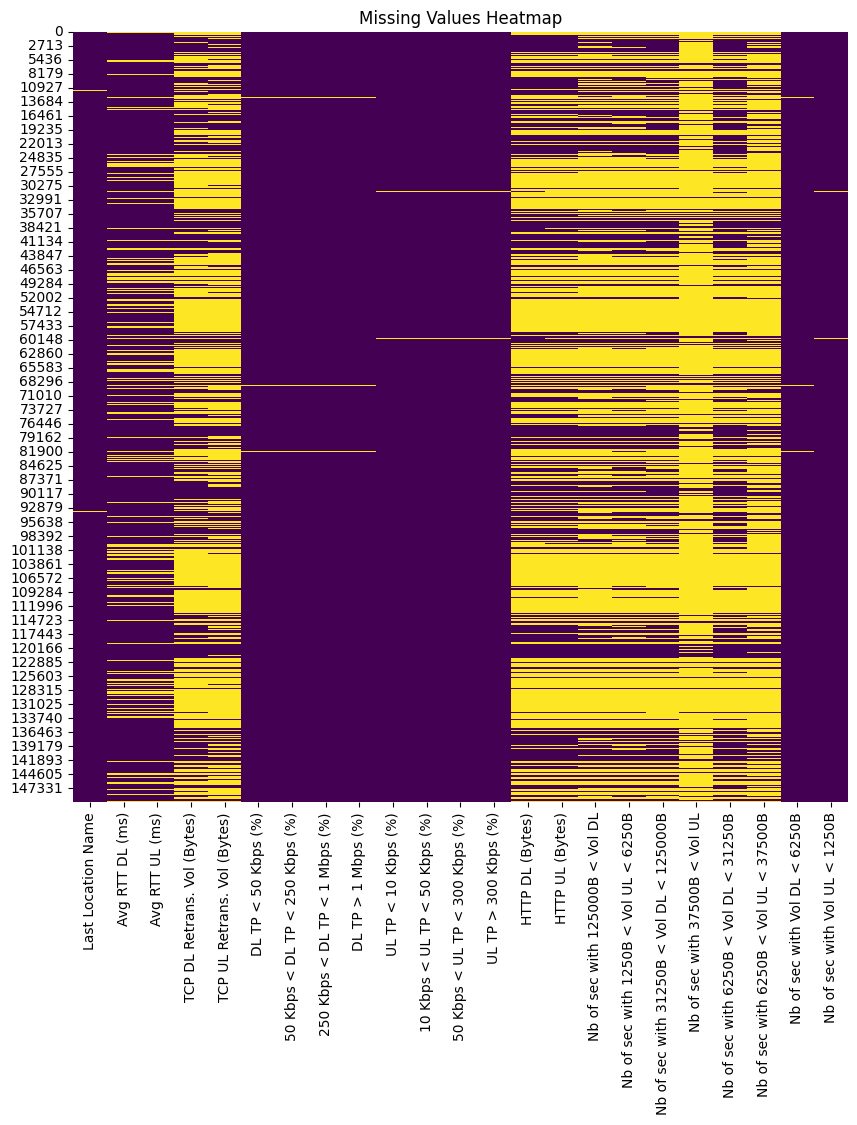

In [28]:
# Plot missing values as a heatmap
plt.figure(figsize=(10, 10))
sns.heatmap(df[null_columns_greater_than_0].isnull(), cbar=False, cmap="viridis")
plt.title("Missing Values Heatmap")
plt.show()

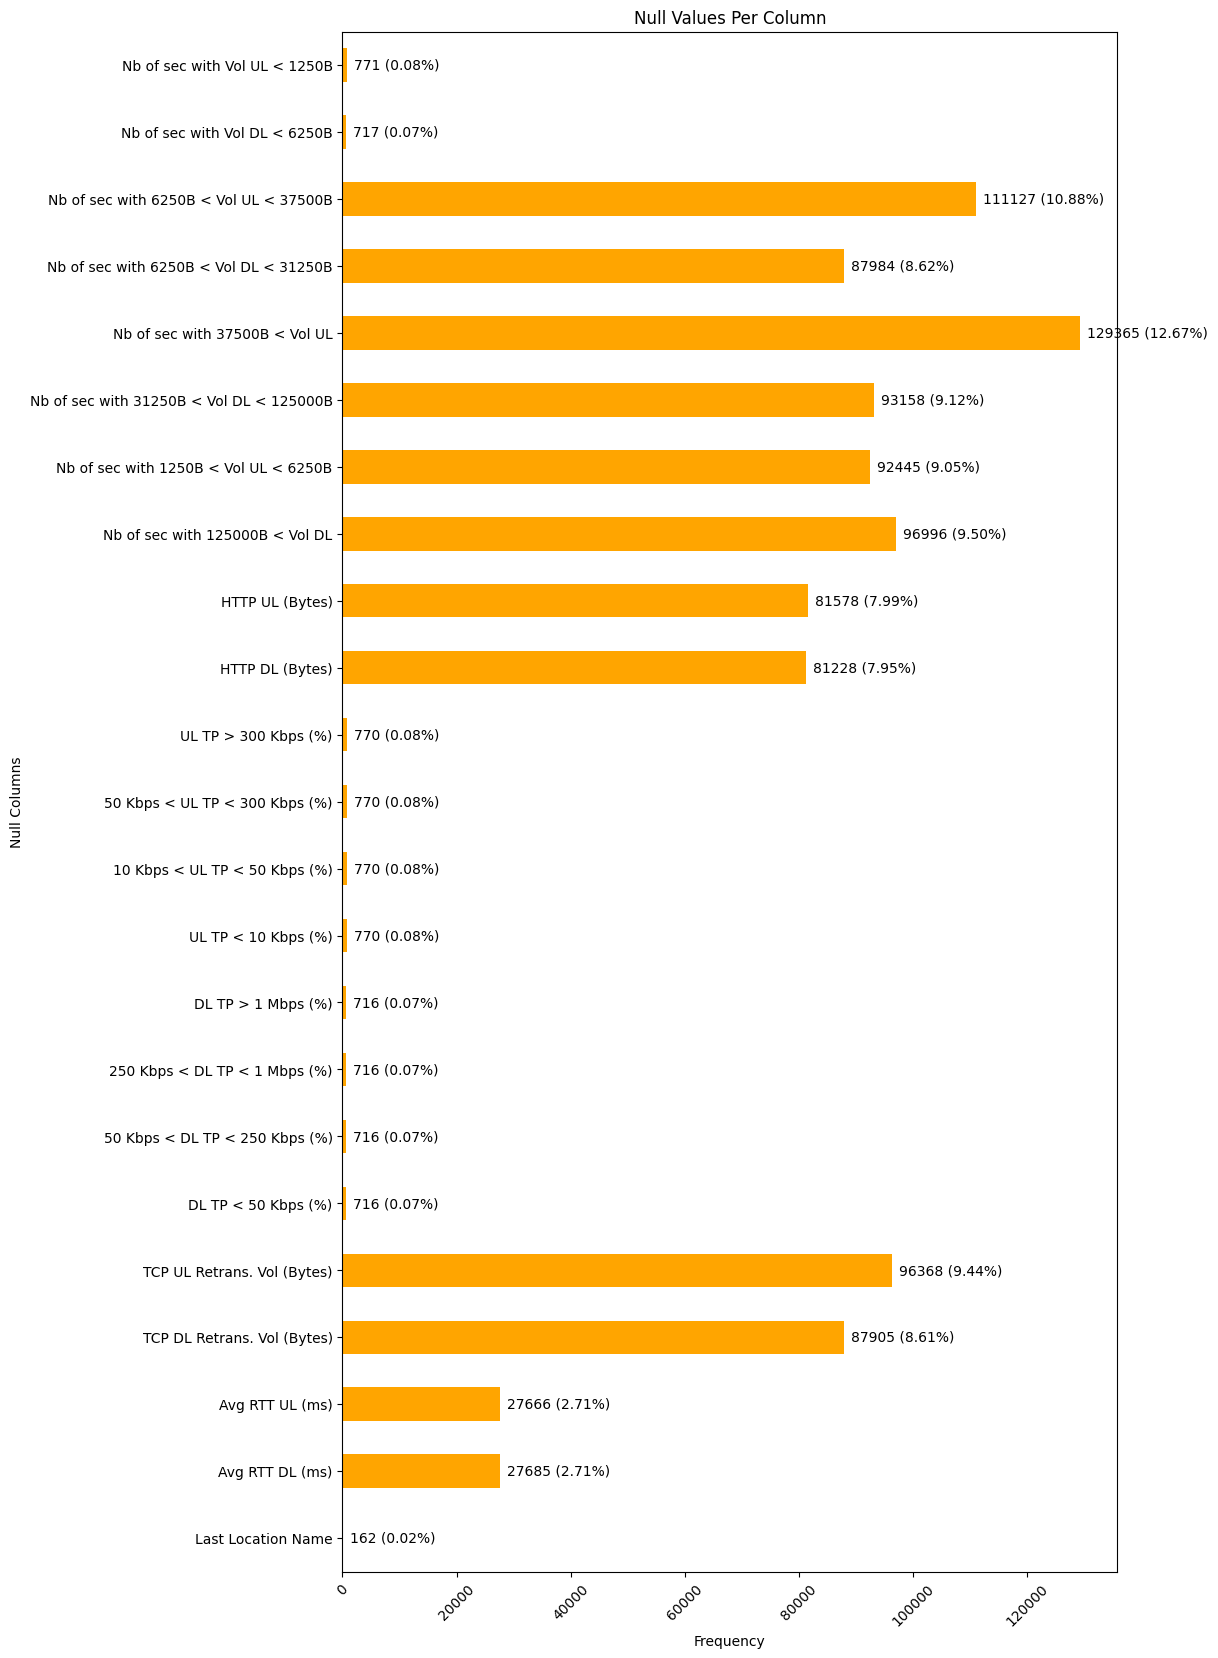

In [29]:
# Count zero or constant values
constant_values = (df[null_columns_greater_than_0].isnull() != 0).sum()

# Calculate percentages
total = constant_values.sum()
percentages = (constant_values / total) * 100

# Bar plot for constant/zero values
ax = constant_values.plot(kind='barh', figsize=(10, 20), color='orange')

# Add number and percentage annotations
for bar, percentage in zip(ax.patches, percentages):
    # Get the bar's width (value) and position
    width = bar.get_width()
    y = bar.get_y() + bar.get_height() / 2
    # Annotate the bar with the value and percentage
    annotation = f'{int(width)} ({percentage:.2f}%)'
    ax.annotate(annotation, xy=(width, y), xytext=(5, 0),
                textcoords="offset points", ha='left', va='center')

# Add labels and title
plt.title("Null Values Per Column")
plt.xlabel("Frequency")
plt.ylabel("Null Columns")
plt.xticks(rotation=45)
plt.show()

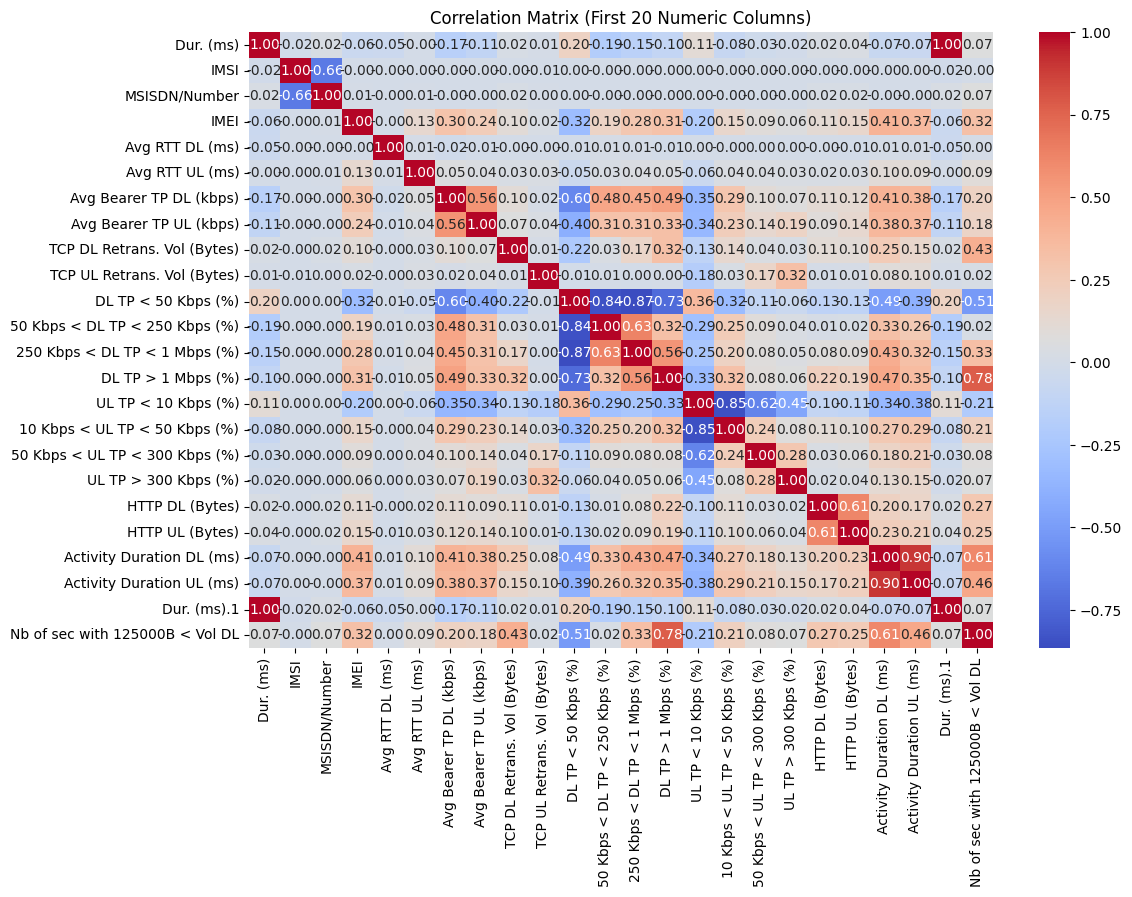

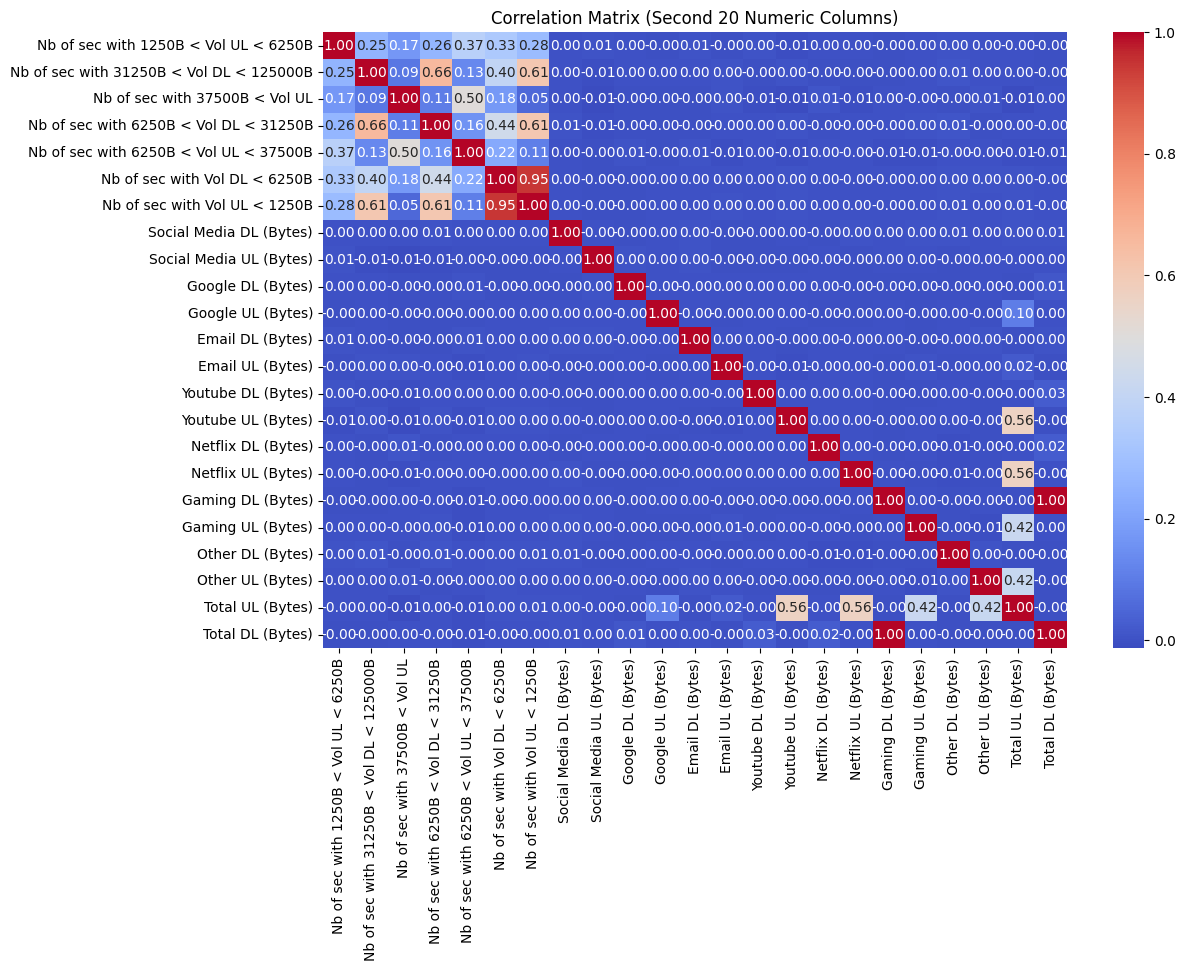

In [31]:
# Select only numeric columns
numeric_data = df.select_dtypes(include=['number'])

# Check if there are at least 20 columns
num_columns = len(numeric_data.columns)
if num_columns < 20:
    print("The dataset has fewer than 20 numeric columns.")
else:
    # First 20 numeric columns
    first_20 = numeric_data.iloc[:, 3:27]
    first_20_corr = first_20.corr()
    
    # Visualize the correlation matrix for the first 20 columns
    plt.figure(figsize=(12, 8))
    sns.heatmap(first_20_corr, annot=True, fmt=".2f", cmap="coolwarm")
    plt.title("Correlation Matrix (First 20 Numeric Columns)")
    plt.show()

    if num_columns > 27:
        # Second 20 numeric columns
        second_20 = numeric_data.iloc[:, 27:55]  # Adjust slice if fewer than 40 columns
        second_20_corr = second_20.corr()
        
        # Visualize the correlation matrix for the second 20 columns
        plt.figure(figsize=(12, 8))
        sns.heatmap(second_20_corr, annot=True, fmt=".2f", cmap="coolwarm")
        plt.title("Correlation Matrix (Second 20 Numeric Columns)")
        plt.show()
    else:
        print("The dataset has fewer than 40 numeric columns.")

In [34]:
df[null_columns_greater_than_0].isna().sum()

Last Location Name                             162
Avg RTT DL (ms)                              27685
Avg RTT UL (ms)                              27666
TCP DL Retrans. Vol (Bytes)                  87905
TCP UL Retrans. Vol (Bytes)                  96368
DL TP < 50 Kbps (%)                            716
50 Kbps < DL TP < 250 Kbps (%)                 716
250 Kbps < DL TP < 1 Mbps (%)                  716
DL TP > 1 Mbps (%)                             716
UL TP < 10 Kbps (%)                            770
10 Kbps < UL TP < 50 Kbps (%)                  770
50 Kbps < UL TP < 300 Kbps (%)                 770
UL TP > 300 Kbps (%)                           770
HTTP DL (Bytes)                              81228
HTTP UL (Bytes)                              81578
Nb of sec with 125000B < Vol DL              96996
Nb of sec with 1250B < Vol UL < 6250B        92445
Nb of sec with 31250B < Vol DL < 125000B     93158
Nb of sec with 37500B < Vol UL              129365
Nb of sec with 6250B < Vol DL <

Skewness for first group of columns:
Dur. (ms)                        3.952609
IMSI                            41.045956
MSISDN/Number                  332.155856
IMEI                             1.071470
Avg RTT DL (ms)                 62.907828
Avg RTT UL (ms)                 28.457415
Avg Bearer TP DL (kbps)          2.589437
Avg Bearer TP UL (kbps)          4.503413
TCP DL Retrans. Vol (Bytes)     15.951809
dtype: float64


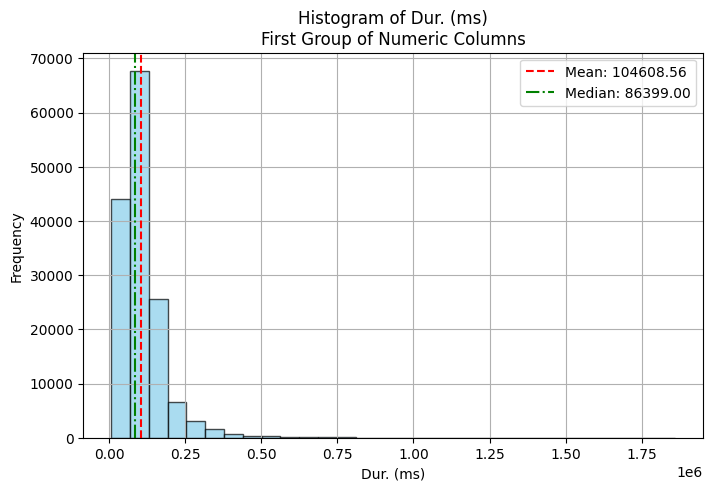

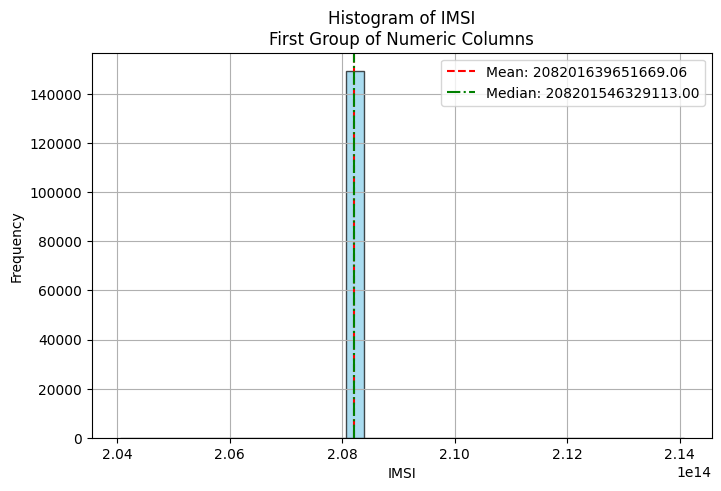

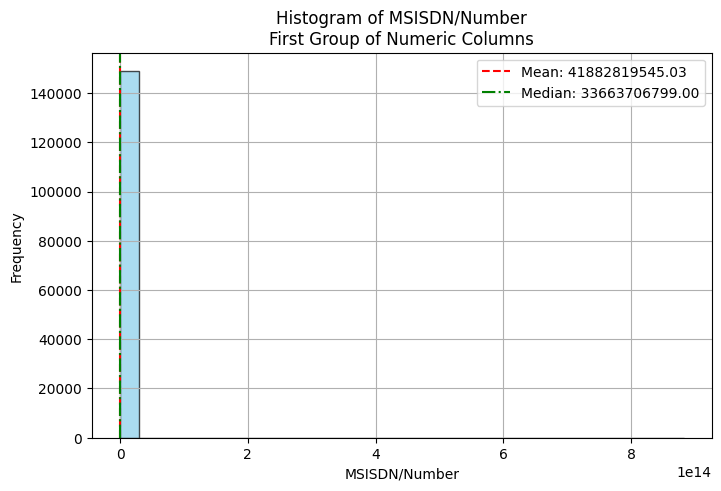

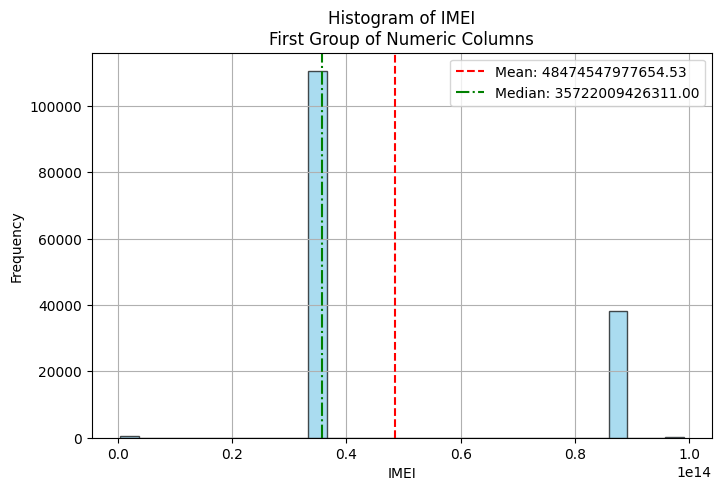

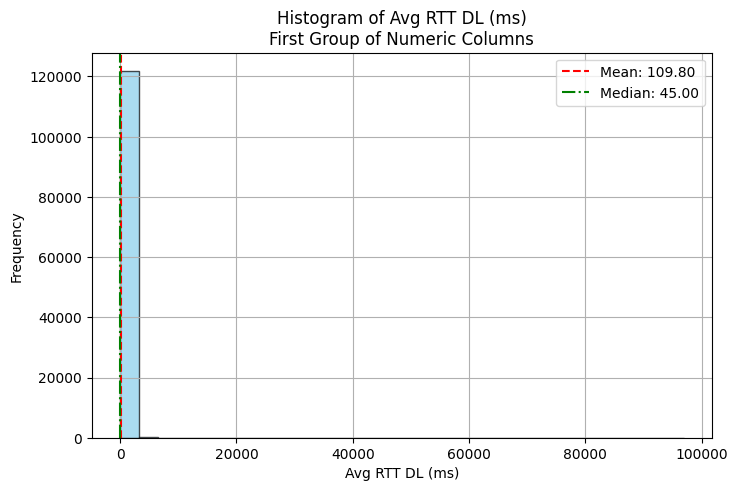

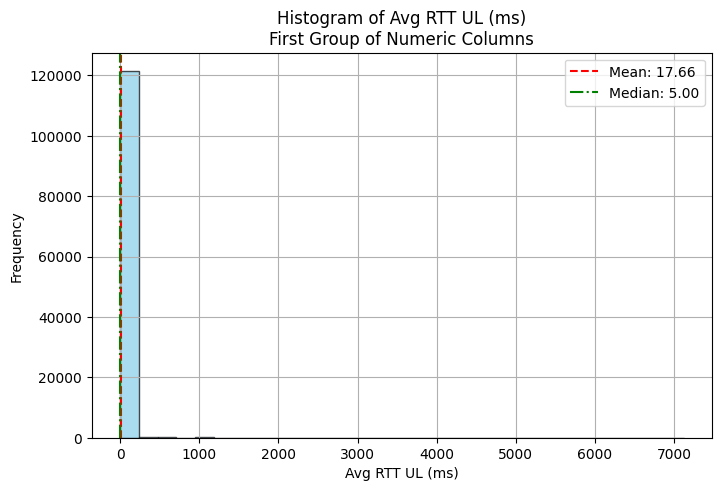

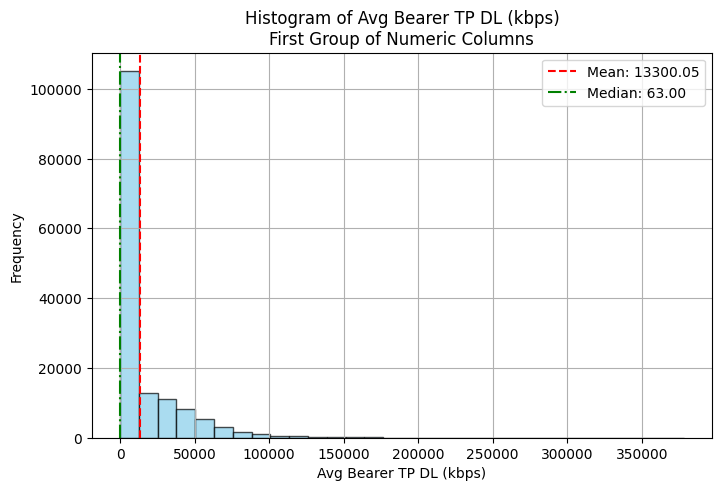

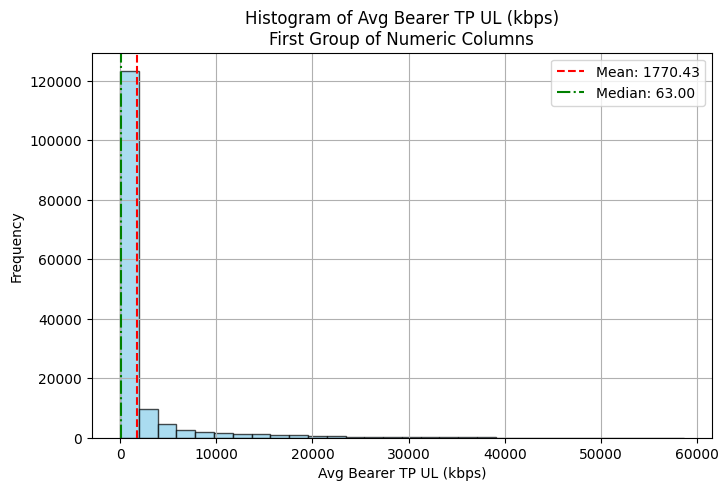

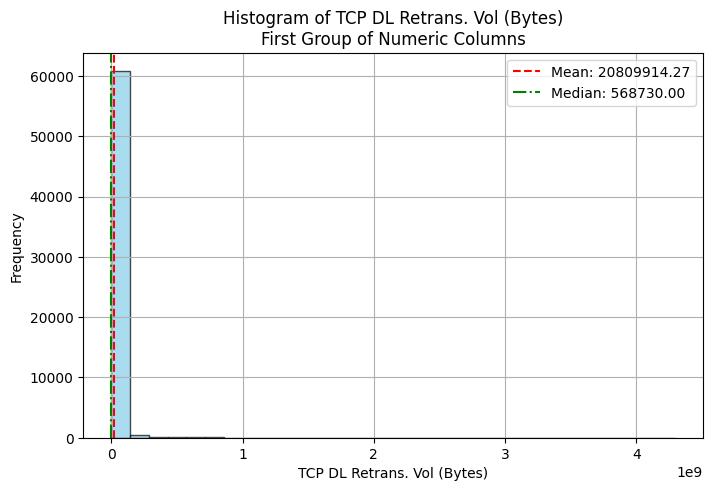

Skewness for second group of columns:
TCP UL Retrans. Vol (Bytes)       84.113393
DL TP < 50 Kbps (%)               -2.297803
50 Kbps < DL TP < 250 Kbps (%)     3.271453
250 Kbps < DL TP < 1 Mbps (%)      4.566158
DL TP > 1 Mbps (%)                 5.370351
UL TP < 10 Kbps (%)               -8.985016
10 Kbps < UL TP < 50 Kbps (%)     10.943888
50 Kbps < UL TP < 300 Kbps (%)    21.878495
UL TP > 300 Kbps (%)              36.174053
HTTP DL (Bytes)                   38.944710
HTTP UL (Bytes)                   32.474970
Activity Duration DL (ms)          5.872256
dtype: float64


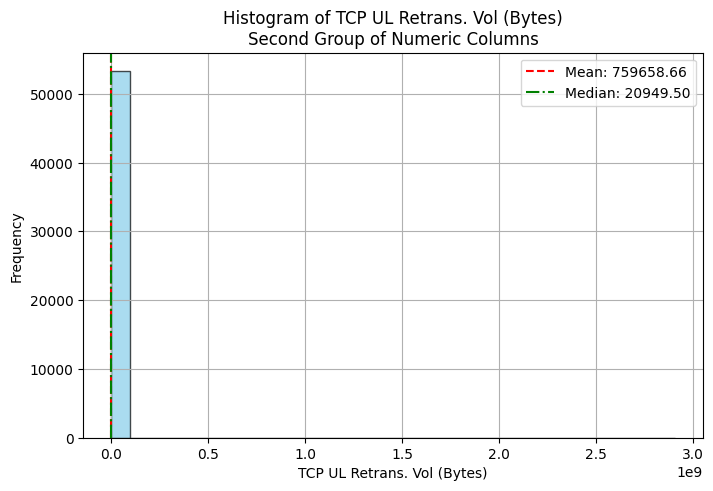

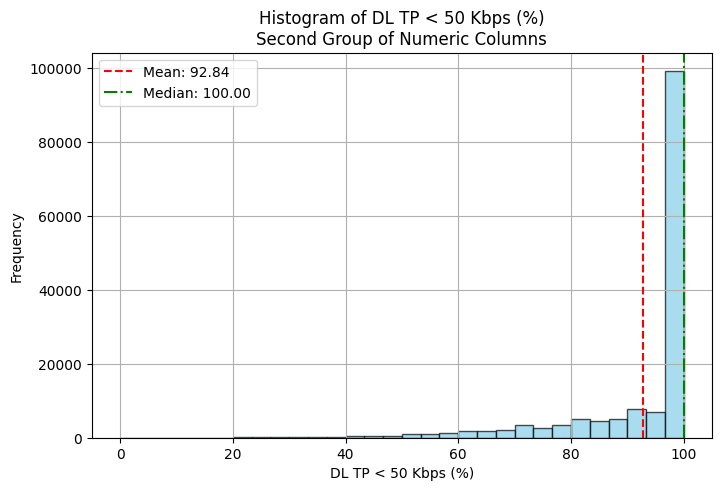

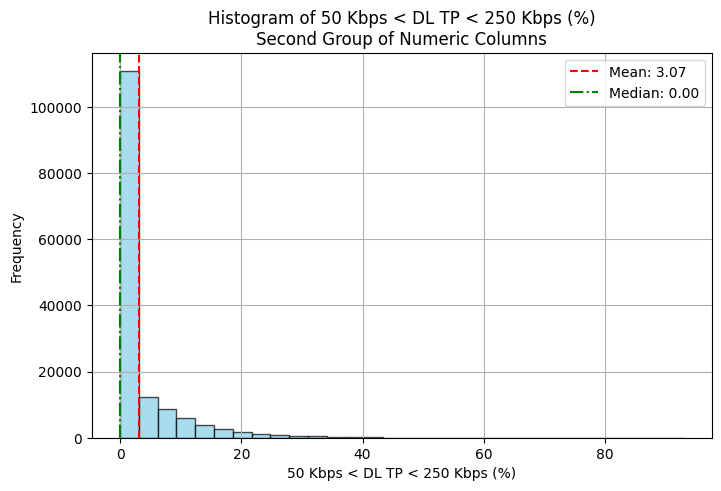

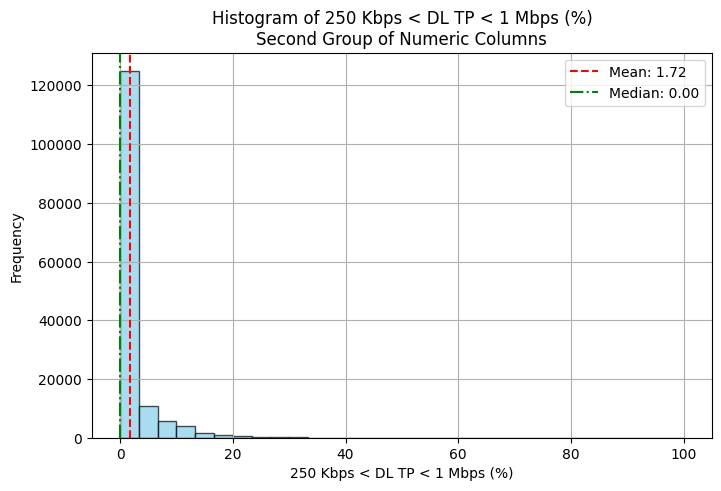

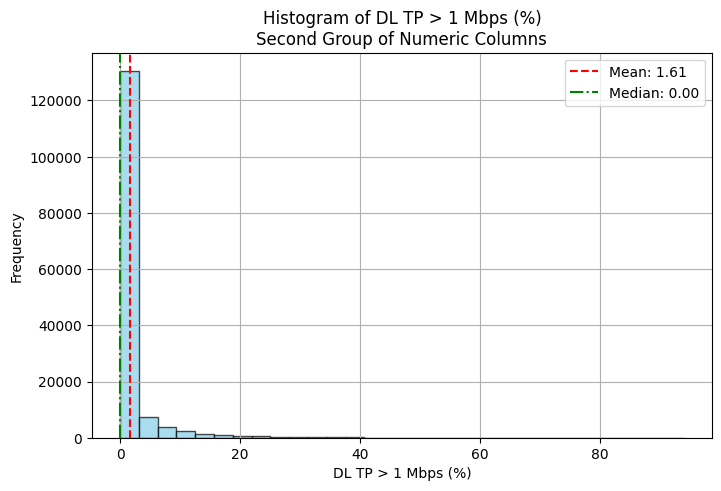

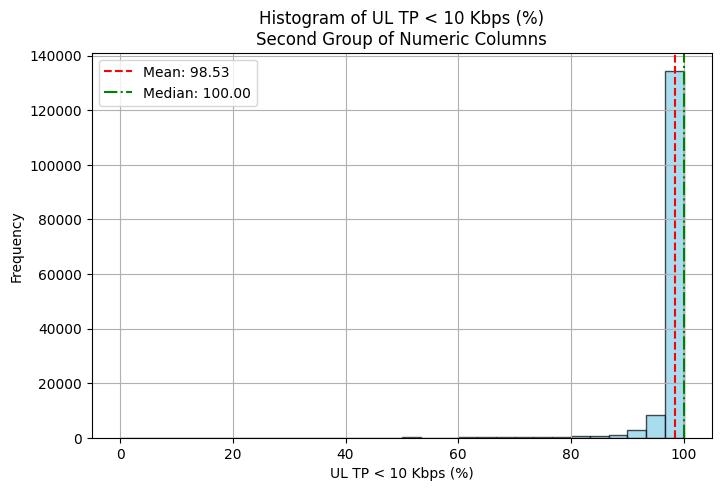

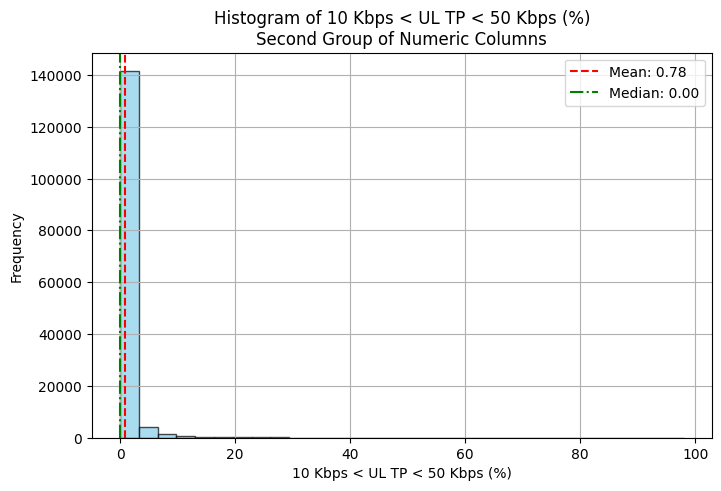

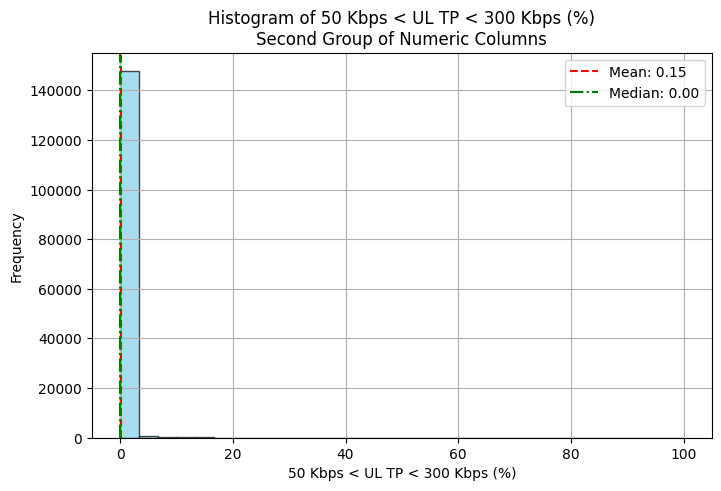

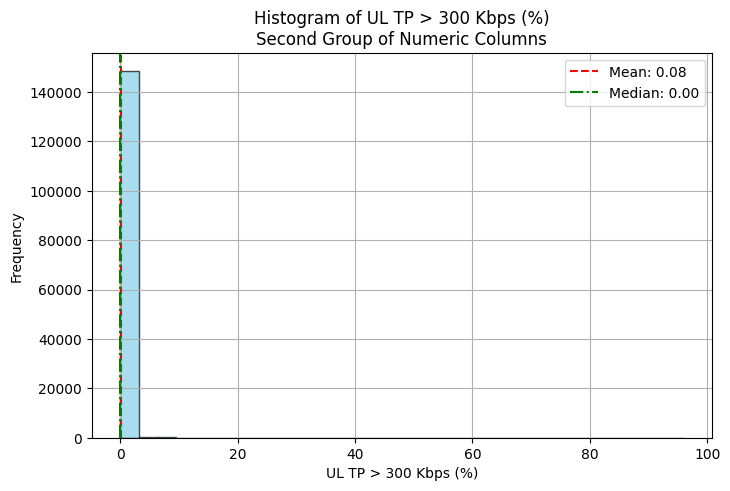

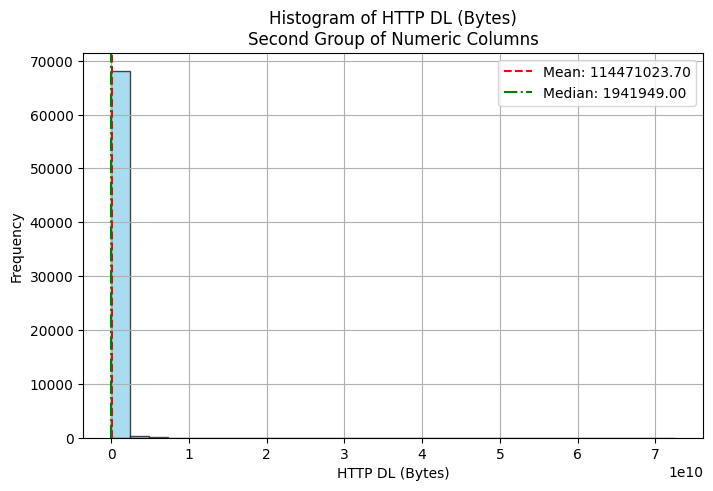

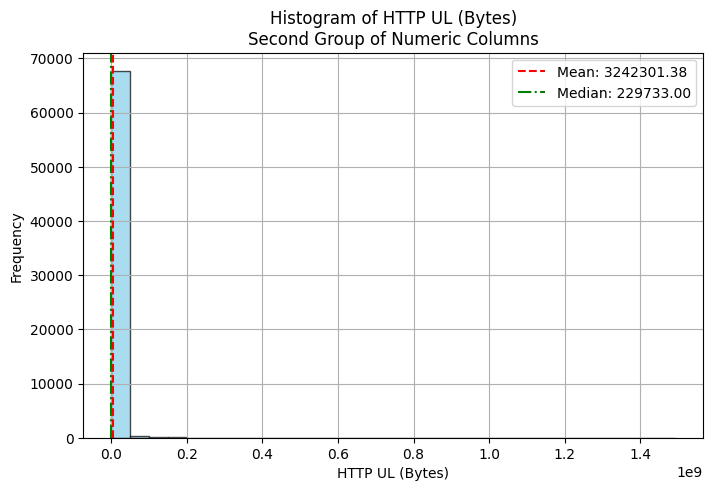

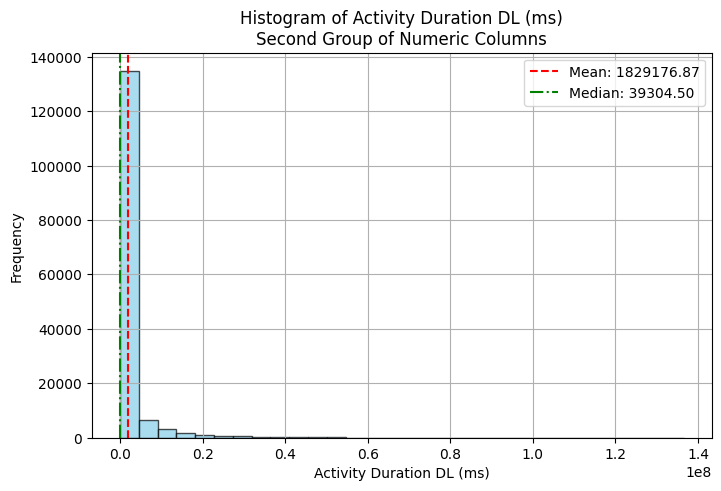

Skewness for third group of columns:
Activity Duration UL (ms)                    7.382557
Dur. (ms).1                                  3.952609
Nb of sec with 125000B < Vol DL              6.592502
Nb of sec with 1250B < Vol UL < 6250B       22.035745
Nb of sec with 31250B < Vol DL < 125000B     6.610541
Nb of sec with 37500B < Vol UL              21.560028
Nb of sec with 6250B < Vol DL < 31250B       6.896050
Nb of sec with 6250B < Vol UL < 37500B      19.642752
Nb of sec with Vol DL < 6250B                9.042166
Nb of sec with Vol UL < 1250B                7.495176
Social Media DL (Bytes)                     -0.002136
Social Media UL (Bytes)                     -0.000359
Google DL (Bytes)                           -0.008092
Google UL (Bytes)                            0.002216
Email DL (Bytes)                            -0.002463
Email UL (Bytes)                             0.007358
dtype: float64


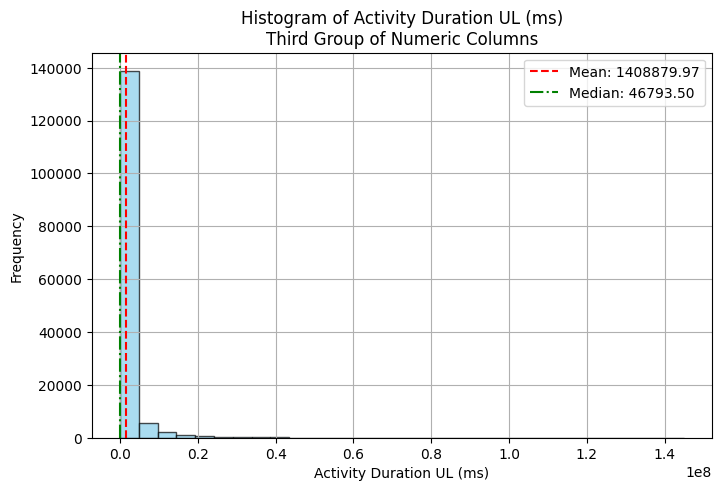

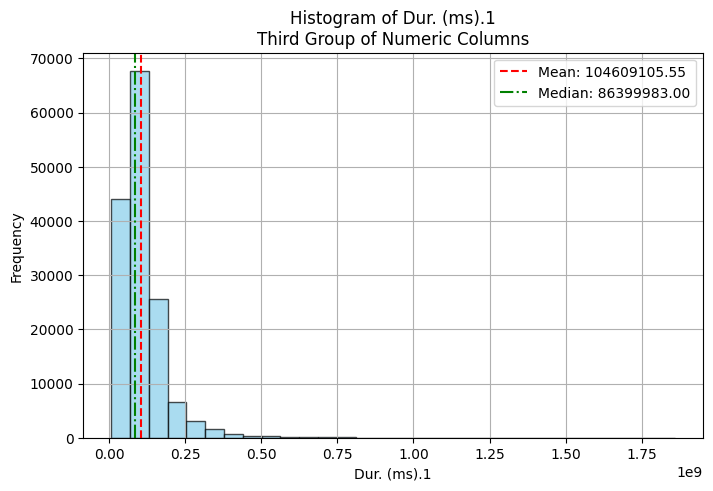

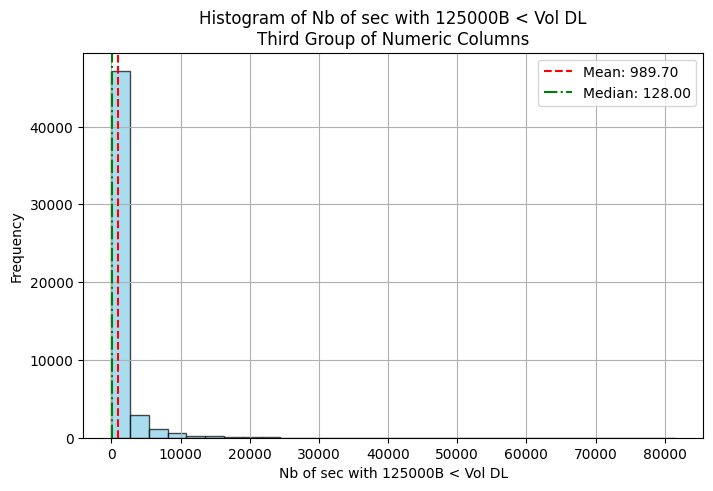

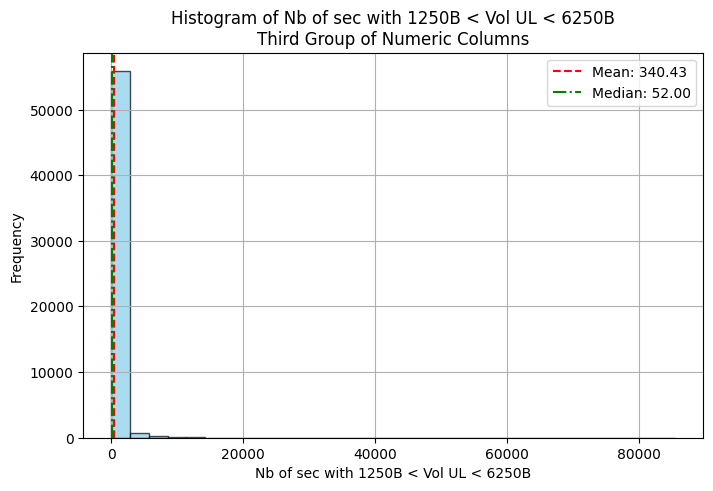

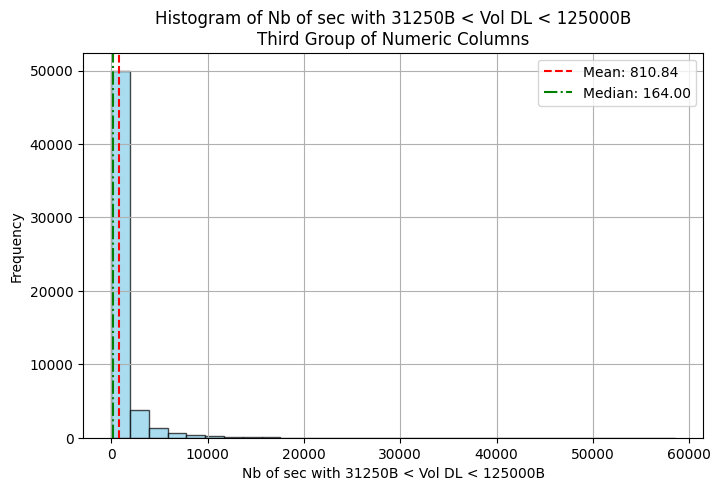

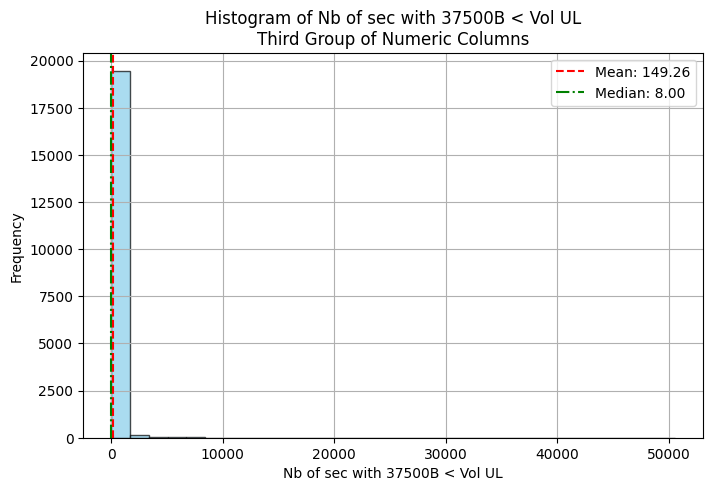

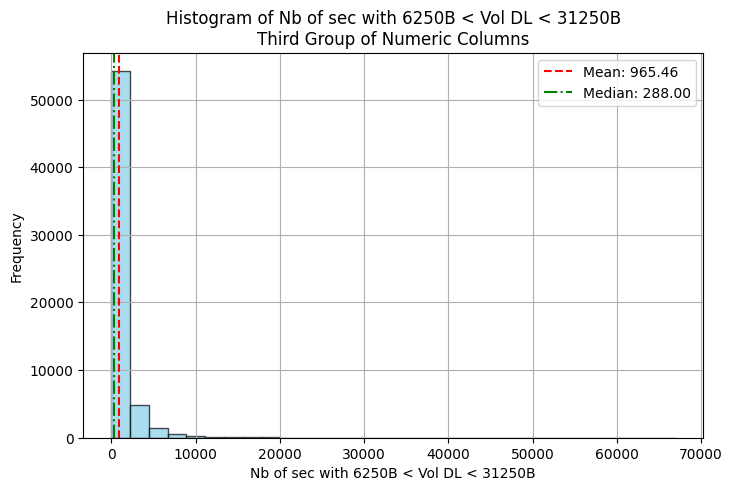

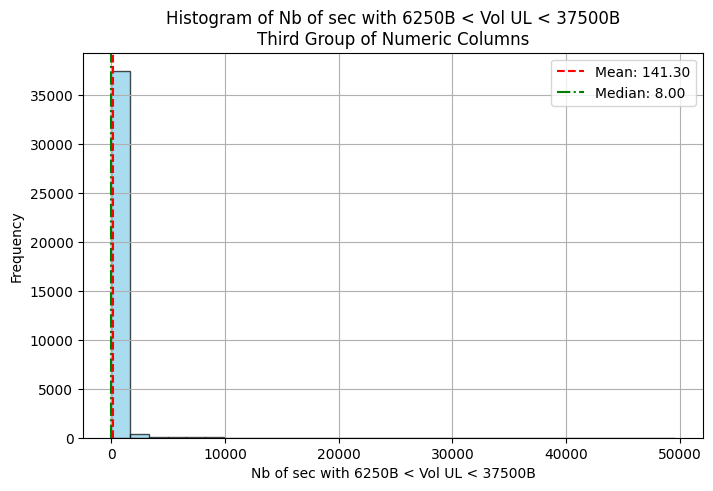

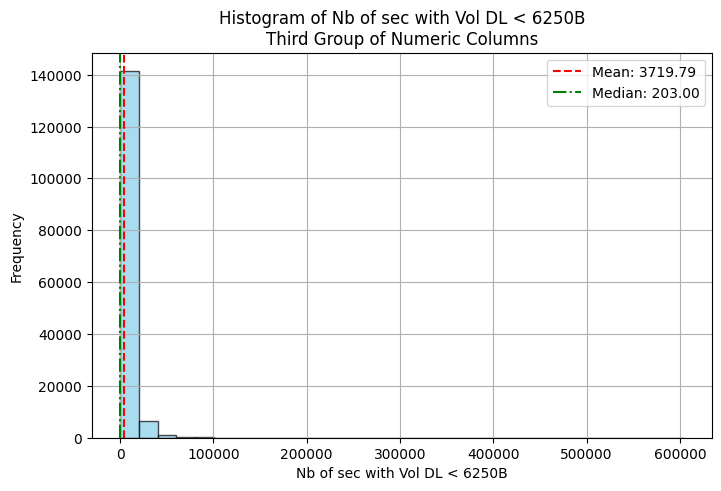

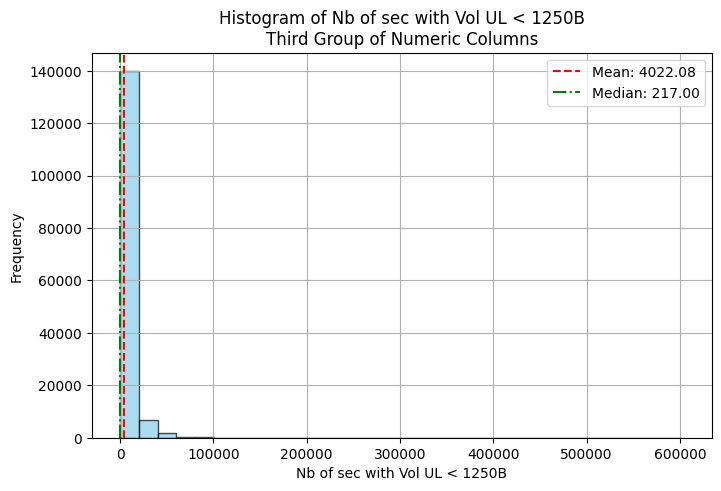

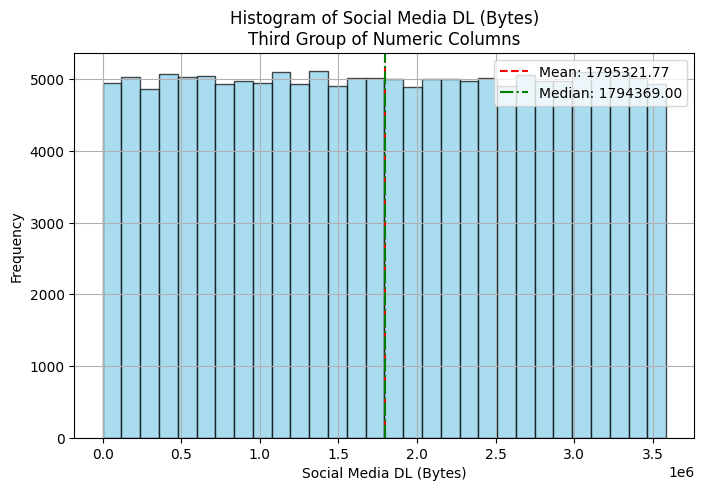

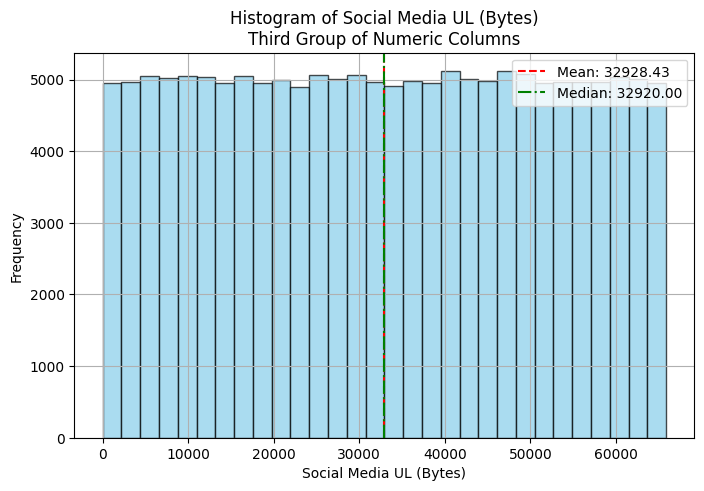

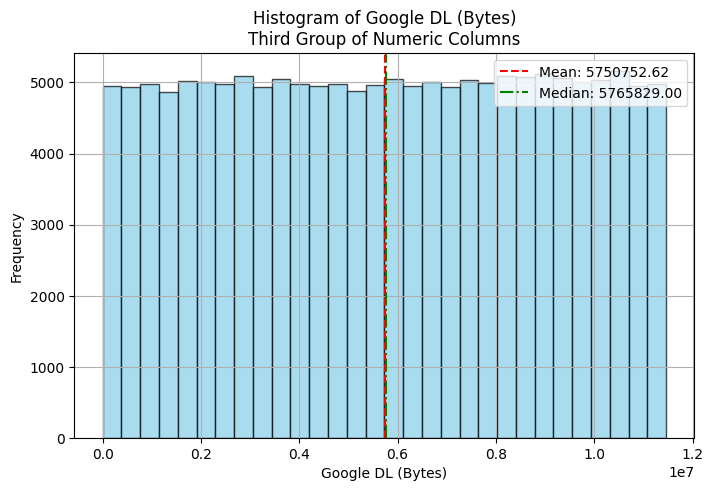

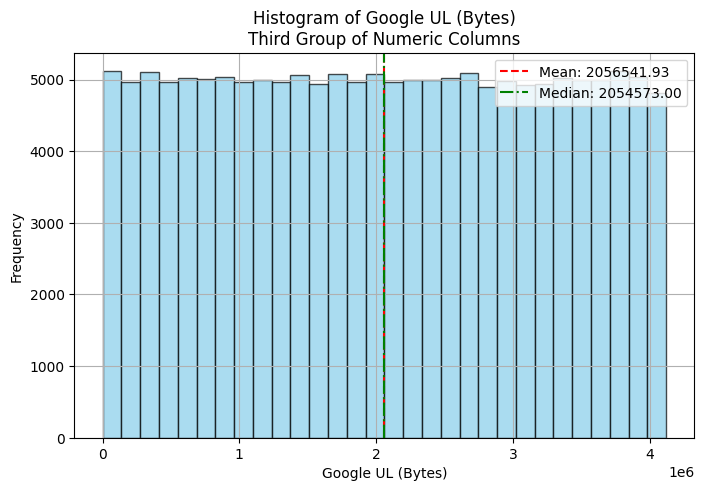

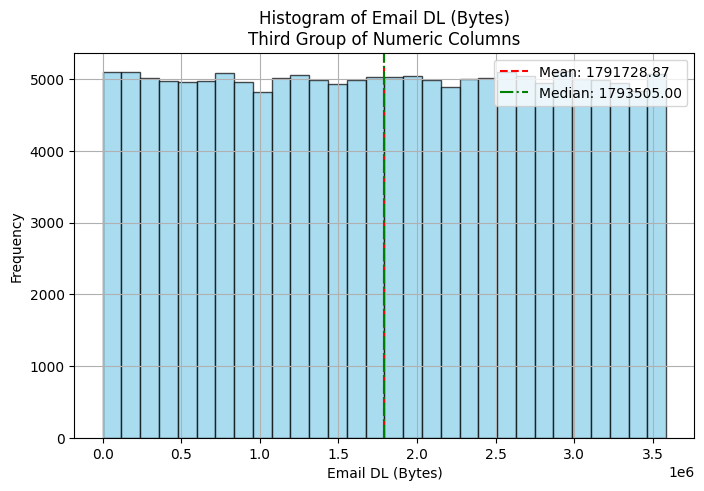

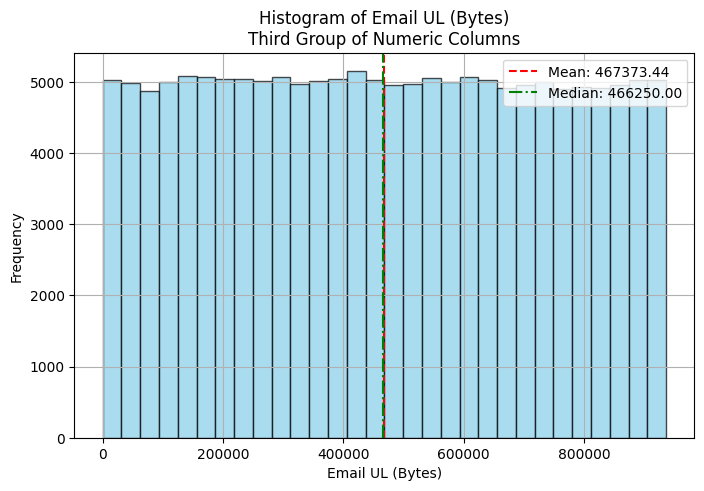

Skewness for fourth group of columns:
Youtube DL (Bytes)    0.000231
Youtube UL (Bytes)   -0.001142
Netflix DL (Bytes)   -0.002442
Netflix UL (Bytes)   -0.000113
Gaming DL (Bytes)    -0.003460
Gaming UL (Bytes)    -0.001840
Other DL (Bytes)      0.001400
Other UL (Bytes)      0.001392
Total UL (Bytes)     -0.002456
Total DL (Bytes)     -0.003153
dtype: float64


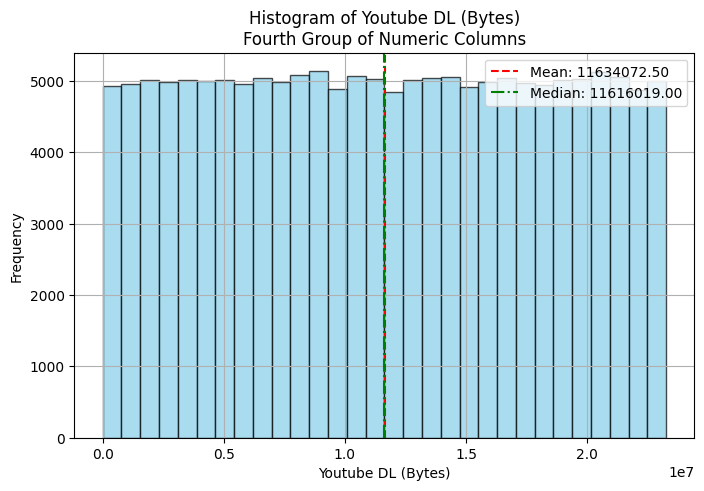

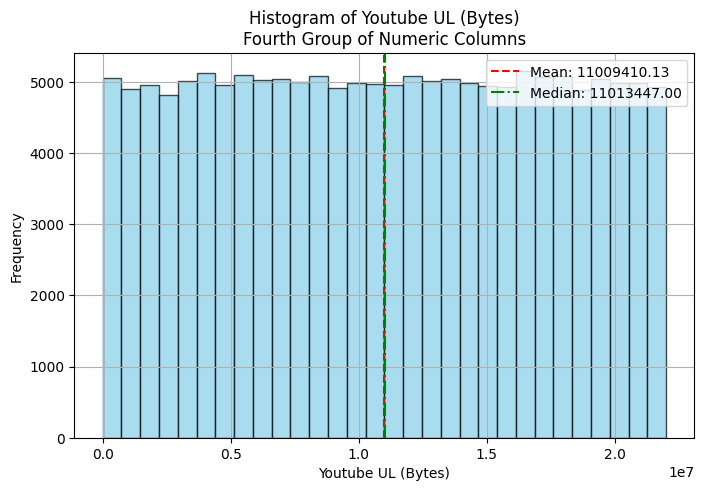

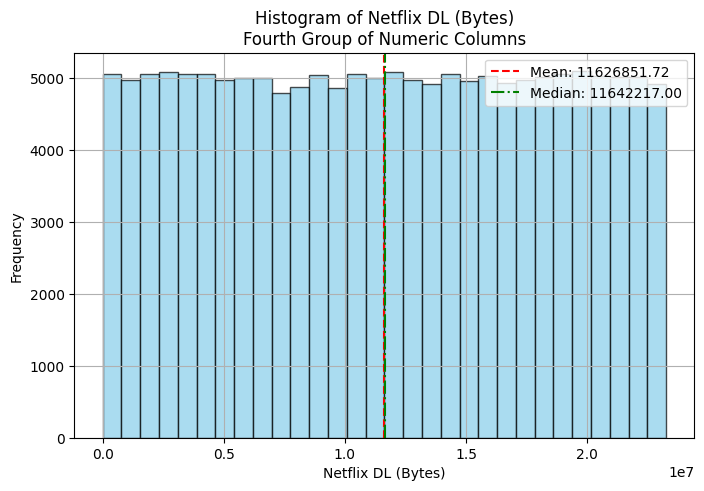

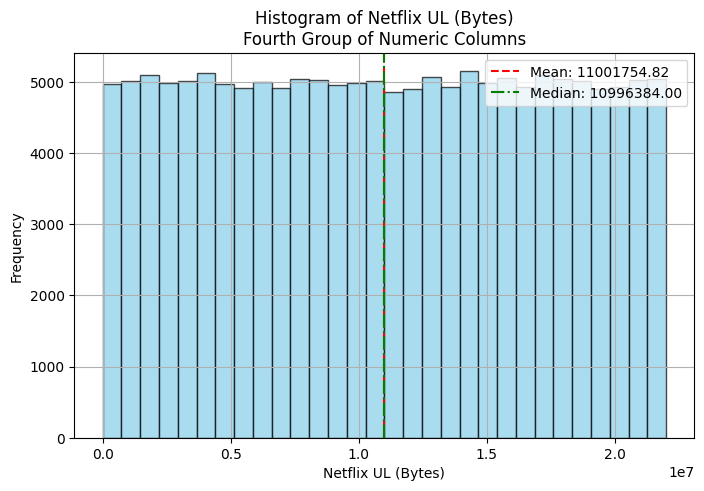

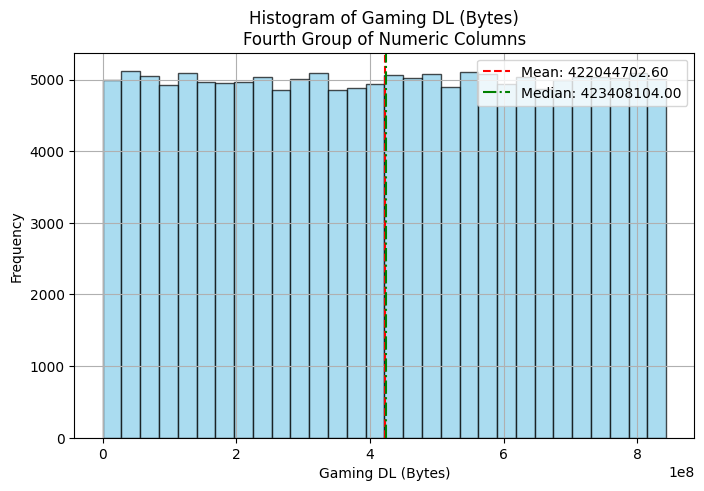

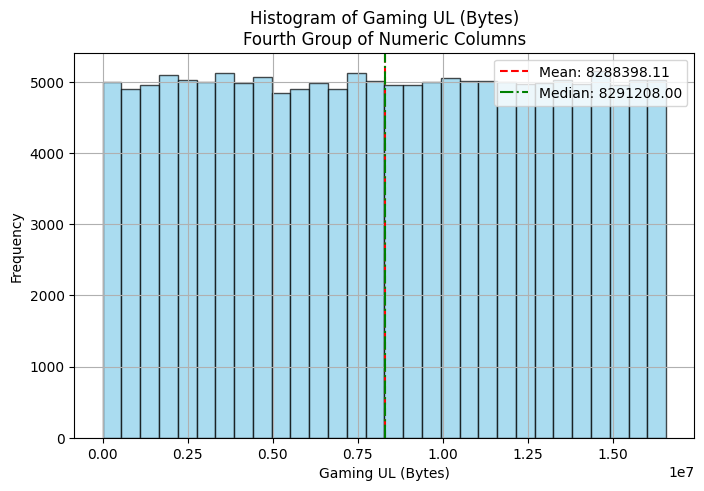

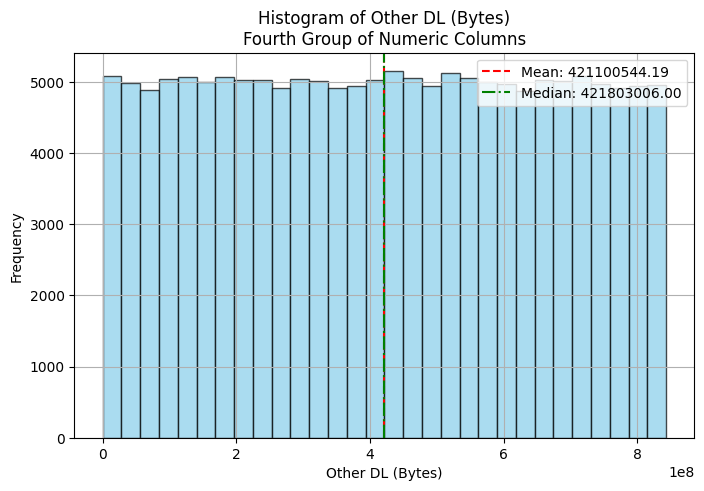

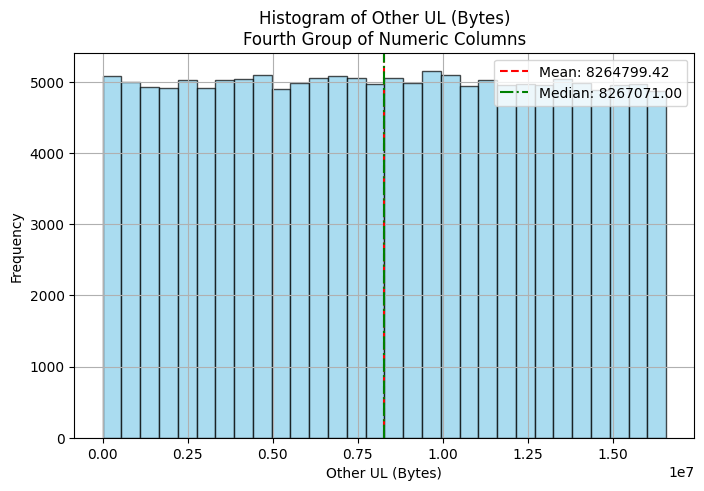

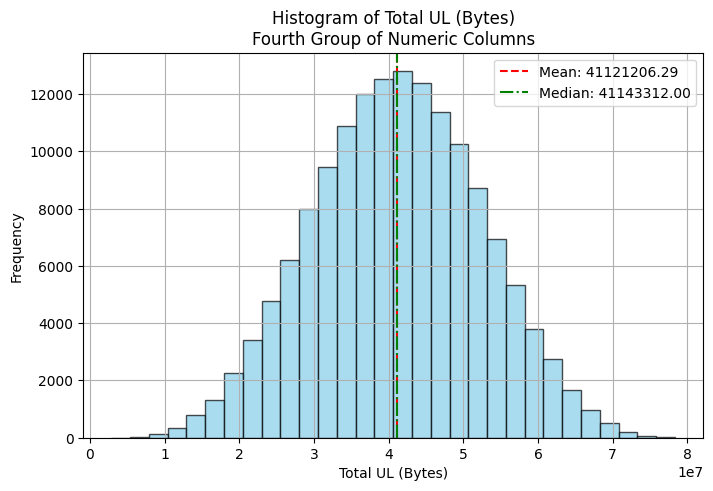

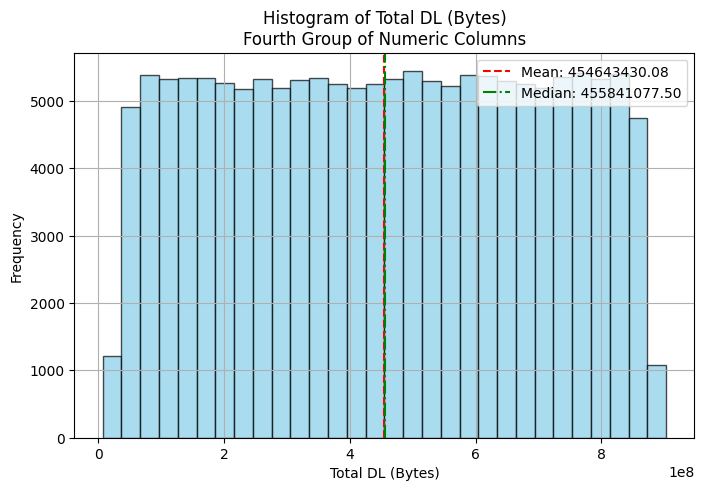

In [35]:
if num_columns < 10:
    print("The dataset has fewer than 10 numeric columns.")
else:
    def plot_histograms_with_lines(group, title):
        """Plots histograms with vertical lines for mean and median."""
        for column in group.columns:
            plt.figure(figsize=(8, 5))
            group[column].hist(bins=30, color='skyblue', edgecolor='black', alpha=0.7)
            
            # Add vertical lines for mean and median
            mean_val = group[column].mean()
            median_val = group[column].median()
            
            plt.axvline(mean_val, color='red', linestyle='--', linewidth=1.5, label=f'Mean: {mean_val:.2f}')
            plt.axvline(median_val, color='green', linestyle='-.', linewidth=1.5, label=f'Median: {median_val:.2f}')
            
            # Add title and legend
            plt.title(f'Histogram of {column}\n{title}')
            plt.xlabel(column)
            plt.ylabel('Frequency')
            plt.legend()
            plt.show()

    # First group of numeric columns
    first_group = numeric_data.iloc[:, 3:12]
    first_group_skewness = first_group.skew()
    print("Skewness for first group of columns:")
    print(first_group_skewness)
    plot_histograms_with_lines(first_group, "First Group of Numeric Columns")

    if num_columns > 12:
        # Second group of numeric columns
        second_group = numeric_data.iloc[:, 12:24]
        second_group_skewness = second_group.skew()
        print("Skewness for second group of columns:")
        print(second_group_skewness)
        plot_histograms_with_lines(second_group, "Second Group of Numeric Columns")

    if num_columns > 24:
        # Third group of numeric columns
        third_group = numeric_data.iloc[:, 24:40]
        third_group_skewness = third_group.skew()
        print("Skewness for third group of columns:")
        print(third_group_skewness)
        plot_histograms_with_lines(third_group, "Third Group of Numeric Columns")

    if num_columns > 40:
        # Fourth group of numeric columns
        fourth_group = numeric_data.iloc[:, 40:55]
        fourth_group_skewness = fourth_group.skew()
        print("Skewness for fourth group of columns:")
        print(fourth_group_skewness)
        plot_histograms_with_lines(fourth_group, "Fourth Group of Numeric Columns")
    else:
        print("The dataset has fewer than 55 numeric columns.")

As per my observation on the skewness of the graph columns that have missed values all are skiwed, so I decided to use mode for inputation 

In [38]:
# Fill missing values in the specified columns with the mode of each column
for col in null_columns_greater_than_0:
    mode_value = df[col].mode()[0]  # Get the most frequent value (mode)
    df[col].fillna(mode_value, inplace=True)

C:\Users\Admin\AppData\Local\Temp\ipykernel_6576\2824404584.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(mode_value, inplace=True)


In [53]:
# df.columns.to_list

# df['250 Kbps < DL TP < 1 Mbps (%) to (Bytes)'] = df['250 Kbps < DL TP < 1 Mbps (%)'] * 125000, 
# df['DL TP > 1 (Bytes) (%)']  = df['DL TP > 1 (%)'] * 125000

# 'Avg Bearer TP DL (kbps)'
# 'Avg Bearer TP UL (kbps)'
# 'DL TP < 50 Kbps (%)', 
# '50 Kbps < DL TP < 250 Kbps (%)'
# 'UL TP < 10 Kbps (%)', '10 Kbps < UL TP < 50 Kbps (%)',
# '50 Kbps < UL TP < 300 Kbps (%)', 'UL TP > 300 Kbps (%)'

In [62]:
# Verify it
# # Set pandas display options to prevent scientific notation for all numeric columns
# # Set pandas display options to prevent scientific notation
# pd.set_option('display.float_format', '{:,.0f}'.format)

# # Function to convert Kbps or Mbps to Bytes
# def convert_to_bytes(value, unit="kbps"):
#     if unit == "kbps":
#         return value * 125  # Kbps to Bytes (1 Kbps = 125 Bytes)
#     elif unit == "mbps":
#         return value * 125000  # Mbps to Bytes (1 Mbps = 125000 Bytes)
#     return value  # If no conversion is needed

# # Convert the relevant columns (from Kbps or Mbps to Bytes)
# df['Avg Bearer TP DL (bytes)'] = df['Avg Bearer TP DL (kbps)'] * 125 
# df['Avg Bearer TP UL (bytes)'] = df['Avg Bearer TP UL (kbps)'] * 125
# df['Avg Bearer TP DL (bytes) from Mbps'] = df['Avg Bearer TP DL (Mbps)']* 125000 
# df['Avg Bearer TP UL (bytes) from Mbps'] = df['Avg Bearer TP UL (Mbps)']* 125000 


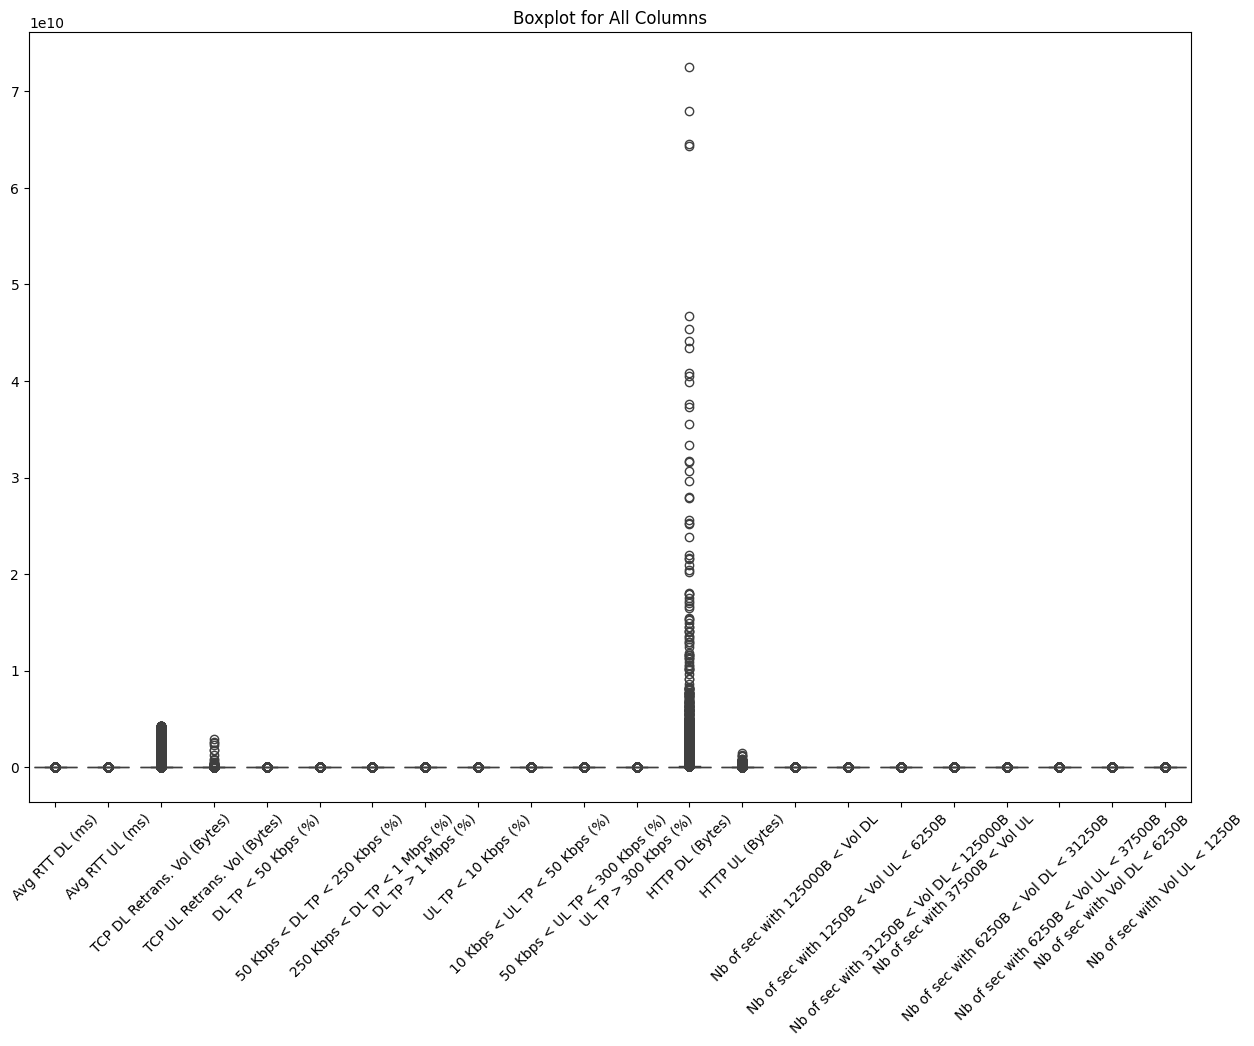

In [35]:
# Boxplots to visualize outliers
plt.figure(figsize=(15, 10))
sns.boxplot(data=df[null_columns_greater_than_0])
plt.xticks(rotation=45)
plt.title("Boxplot for All Columns")
plt.show()

In [63]:
# Check for outliers across all columns
outliers = eda.check_outliers()
outliers

Bearer Id            Start  Start ms              End  \
0      13,114,483,460,844,900,352   4/4/2019 12:01       770  4/25/2019 14:35   
1      13,114,483,482,878,900,224   4/9/2019 13:04       235   4/25/2019 8:15   
2      13,114,483,484,080,500,736   4/9/2019 17:42         1  4/25/2019 11:58   
3      13,114,483,485,442,799,616   4/10/2019 0:31       486   4/25/2019 7:36   
4      13,114,483,499,480,700,928  4/12/2019 20:10       565  4/25/2019 10:40   
...                           ...              ...       ...              ...   
142514  7,349,883,263,998,229,504   4/29/2019 4:32       461  4/30/2019 16:56   
145415  7,349,883,264,108,890,112   4/29/2019 6:09       784  4/30/2019 13:55   
145847 13,114,483,573,196,699,648   4/29/2019 6:22       319   4/30/2019 9:36   
147062 13,114,483,573,254,799,360   4/29/2019 6:48        22   4/30/2019 9:41   
149500  7,349,883,264,224,979,968   4/29/2019 7:23       311  4/30/2019 18:23   

        End ms  Dur. (ms)                IMSI  MSISDN/Number  \
0          662  1,823,652 208,201,448,079,117 33,664,962,239   
1          606  1,365,104 208,201,909,211,140 33,681,854,413   
2          652  1,361,762 208,200,314,458,056 33,760,627,129   
3          171  1,321,509 208,201,402,342,131 33,750,343,200   
4          954  1,089,009 208,201,401,415,120 33,699,795,932   
...        ...        ...                 ...            ...   
142514     418    131,003 208,201,544,102,133 33,698,417,017   
145415     817    114,369 208,201,448,794,091 33,627,855,552   
145847     250     98,046 208,201,772,037,029 33,687,021,765   
147062     476     96,759 208,201,448,068,060 33,660,086,322   
149500     454    125,994 208,202,100,690,066 33,686,302,426   

                     IMEI     Last Location Name  ...  Youtube DL (Bytes)  \
0      35,521,209,507,511  9.16456699548519E+015  ...          15,854,611   
1      35,794,009,006,359                L77566A  ...          20,247,395   
2      35,281,510,359,387                D42335A  ...          19,725,661   
3      35,356,610,164,913                T21824A  ...          21,388,122   
4      35,407,009,745,539                D88865A  ...          15,259,380   
...                   ...                    ...  ...                 ...   
142514 86,909,803,645,919                D50549B  ...          12,771,344   
145415 35,579,507,442,287                T16786A  ...           8,094,060   
145847 86,274,204,993,295                D72336C  ...           2,871,802   
147062 35,302,509,055,427                T70061B  ...           3,740,296   
149500 35,931,006,878,518                D11837B  ...          14,197,294   

        Youtube UL (Bytes)  Netflix DL (Bytes)  Netflix UL (Bytes)  \
0                2,501,332           8,198,936           9,656,251   
1               19,111,729          18,338,413          17,227,132   
2               14,699,576          17,587,794           6,163,408   
3               15,146,643          13,994,646           1,097,942   
4               18,962,873          17,124,581             415,218   
...                    ...                 ...                 ...   
142514          20,091,617          10,623,504          21,769,536   
145415           2,220,735          12,373,161           1,851,472   
145847          20,791,143          10,696,723          19,102,758   
147062             542,096             356,961              59,834   
149500          20,478,032           3,361,021          21,185,346   

        Gaming DL (Bytes)  Gaming UL (Bytes)  Other DL (Bytes)  \
0             278,082,303         14,344,150       171,744,450   
1             608,750,074          1,170,709       526,904,238   
2             229,584,621            395,630       410,692,588   
3             799,538,153         10,849,722       749,039,933   
4             527,707,248          3,529,801       550,709,500   
...                   ...                ...               ...   
142514        760,997,630         15,484,064       731

In [10]:
# Count the occurrences of each IMEI (representing handsets)
handset_counts = df['Handset Type'].value_counts()

# Get the top 10 handsets (most common IMEIs)
top_10_handsets = handset_counts.head(10)

# Print the result
print("Top 10 Handsets Used by Customers:")
print(top_10_handsets)

Top 10 Handsets Used by Customers:
Handset Type
Huawei B528S-23A                19752
Apple iPhone 6S (A1688)          9419
Apple iPhone 6 (A1586)           9023
undefined                        8987
Apple iPhone 7 (A1778)           6326
Apple iPhone Se (A1723)          5187
Apple iPhone 8 (A1905)           4993
Apple iPhone Xr (A2105)          4568
Samsung Galaxy S8 (Sm-G950F)     4520
Apple iPhone X (A1901)           3813
Name: count, dtype: int64


In [11]:
# Count the occurrences of each IMEI (representing handsets)
handset_counts = df['Handset Manufacturer'].value_counts()

# Get the top 10 handsets (most common IMEIs)
top_3_handsets = handset_counts.head(3)

# Print the result
print("Top 10 Handsets Used by Customers:")
print(top_3_handsets)

Top 10 Handsets Used by Customers:
Handset Manufacturer
Apple      59565
Samsung    40839
Huawei     34423
Name: count, dtype: int64


In [12]:
# Step 1: Count occurrences of each Handset Manufacturer and get the top 3
manufacturer_counts = df['Handset Manufacturer'].value_counts()
top_3_manufacturers = manufacturer_counts.head(3).index

# Step 2: Find the top 5 handsets for each of the top 3 manufacturers
top_5_handsets_per_manufacturer = {}

for manufacturer in top_3_manufacturers:
    # Filter the DataFrame for the current manufacturer
    manufacturer_data = df[df['Handset Manufacturer'] == manufacturer]
    
    # Count the occurrences of each handset type for this manufacturer
    handset_counts = manufacturer_data['Handset Type'].value_counts()
    
    # Get the top 5 handsets for this manufacturer
    top_5_handsets = handset_counts.head(5)
    
    # Store the result in a dictionary
    top_5_handsets_per_manufacturer[manufacturer] = top_5_handsets

# Step 3: Print the results
print("Top 5 Handsets Per Top 3 Handset Manufacturers:")
for manufacturer, handsets in top_5_handsets_per_manufacturer.items():
    print(f"\nManufacturer: {manufacturer}")
    print(handsets)


Top 5 Handsets Per Top 3 Handset Manufacturers:

Manufacturer: Apple
Handset Type
Apple iPhone 6S (A1688)    9419
Apple iPhone 6 (A1586)     9023
Apple iPhone 7 (A1778)     6326
Apple iPhone Se (A1723)    5187
Apple iPhone 8 (A1905)     4993
Name: count, dtype: int64

Manufacturer: Samsung
Handset Type
Samsung Galaxy S8 (Sm-G950F)    4520
Samsung Galaxy A5 Sm-A520F      3724
Samsung Galaxy J5 (Sm-J530)     3696
Samsung Galaxy J3 (Sm-J330)     3484
Samsung Galaxy S7 (Sm-G930X)    3199
Name: count, dtype: int64

Manufacturer: Huawei
Handset Type
Huawei B528S-23A                  19752
Huawei E5180                       2079
Huawei P20 Lite Huawei Nova 3E     2021
Huawei P20                         1480
Huawei Y6 2018                      997
Name: count, dtype: int64


### **Interpretation and Recommendations for Marketing**

The analysis reveals distinct usage trends across the top three handset manufacturers, providing valuable insights for targeted marketing strategies. **Apple** users predominantly rely on older models such as the iPhone 6S and iPhone 6, with significant numbers also using mid-range devices like the iPhone 7 and SE. This indicates a strong sense of brand loyalty among Apple customers, even for older-generation devices. However, it also highlights an opportunity to promote upgrades to newer models by emphasizing advancements in features and performance. Trade-in programs or loyalty incentives could be highly effective in encouraging these users to transition to the latest iPhones, such as the iPhone 13 or SE 3rd Generation.

**Samsung** demonstrates a diverse appeal, with a balance between flagship devices like the Galaxy S8 and mid-range models such as the Galaxy A5 and J5. This suggests that Samsung’s strategy of catering to both premium and budget-conscious segments is working well. Marketing efforts should focus on highlighting the value of mid-range devices while offering attractive upgrade campaigns for users of older flagship models like the Galaxy S8 and S7. Bundled offers or financing options for new Galaxy A and S series models could help retain and grow the customer base.

**Huawei** shows a unique strength in network equipment, with the Huawei B528S-23A dominating the dataset. This presents an opportunity to bundle network devices with smartphones to create attractive value propositions for consumers. Among smartphones, Huawei’s popularity lies in affordable and mid-range models like the P20 Lite and Y6 2018. Campaigns focusing on affordability, durability, and feature-rich devices can help attract and retain customers in this segment. 

Overall, the marketing teams should emphasize **device longevity and upgrade potential**, leveraging the observed trend of customers holding onto older devices. Additionally, region-specific campaigns based on the geographic popularity of these handsets could optimize results. Tailored strategies focusing on affordability for Huawei, versatility for Samsung, and loyalty programs for Apple can ensure maximum engagement and sales growth across all customer segments.

In [14]:
# Group by user column (e.g., IMSI or MSISDN/Number)
user_column = "IMSI"
grouped = df.groupby(user_column)

# Aggregate required metrics
aggregated_data = grouped.agg(
    number_of_sessions=('Bearer Id', 'count'),  # Count xDR sessions
    total_session_duration=('Dur. (ms)', 'sum'),  # Sum session durations
    total_download=('Total DL (Bytes)', 'sum'),  # Total DL data
    total_upload=('Total UL (Bytes)', 'sum'),  # Total UL data
    youtube_dl=('Youtube DL (Bytes)', 'sum'),  # YouTube DL data
    youtube_ul=('Youtube UL (Bytes)', 'sum'),  # YouTube UL data
    netflix_dl=('Netflix DL (Bytes)', 'sum'),  # Netflix DL data
    netflix_ul=('Netflix UL (Bytes)', 'sum'),  # Netflix UL data
    gaming_dl=('Gaming DL (Bytes)', 'sum'),  # Gaming DL data
    gaming_ul=('Gaming UL (Bytes)', 'sum'),  # Gaming UL data
    other_dl=('Other DL (Bytes)', 'sum'),  # Other DL data
    other_ul=('Other UL (Bytes)', 'sum')  # Other UL data
).reset_index()

# Save or display the aggregated data
aggregated_data
# aggregated_data.to_csv("aggregated_user_data.csv", index=False)

IMSI  number_of_sessions  total_session_duration  \
0       2.040471e+14                   1                869844.0   
1       2.040808e+14                   1                877385.0   
2       2.082001e+14                   1                 86019.0   
3       2.082001e+14                   1                 86254.0   
4       2.082001e+14                   2                573923.0   
...              ...                 ...                     ...   
107260  2.082099e+14                   1                127367.0   
107261  2.082099e+14                   1                168543.0   
107262  2.082099e+14                   1                 86399.0   
107263  2.082522e+14                   1                 56613.0   
107264  2.140743e+14                   1                226790.0   

        total_download  total_upload  youtube_dl  youtube_ul  netflix_dl  \
0           78697597.0    60456049.0  18980320.0  21960390.0  21621336.0   
1          194828056.0    37295915.0   9839889.0   2120016.0  10340908.0   
2           31376981.0    53794658.0   5556563.0  14325876.0  15305361.0   
3          392918313.0    33583272.0  22414714.0   3242918.0  10065639.0   
4          961767023.0    71325004.0   4046597.0   9793604.0  30748449.0   
...                ...           ...         ...         ...         ...   
107260     688815403.0    33888182.0   8661662.0   2959812.0   5726631.0   
107261     451173021.0    44692550.0  23251957.0  11605503.0  14193266.0   
107262     307825104.0    30355487.0  22196893.0   6993803.0  15051715.0   
107263     800629358.0    45083854.0  12776130.0  12133368.0   9816072.0   
107264     637123579.0    57382080.0  19339034.0  20678688.0   2731487.0   

        netflix_ul    gaming_dl   gaming_ul      other_dl    other_ul  
0        7224894.0   28092282.0  14977978.0  3.891597e+08  12200737.0  
1       16251392.0  164563605.0  13485133.0  4.676781e+08   2848373.0  
2       16525201.0    3760934.0   5363582.0  5.000445e+08  15929178.0  
3       17720213.0  343946503.0    159394.0  3.009029e+08   8707888.0  
4       26594966.0  910301321.0   7383445.0  1.055869e+09  23566580.0  
...            ...          ...         ...           ...         ...  
107260   5040884.0  664258019.0  14235971.0  5.808342e+08   7560085.0  
107261  16541988.0  408071389.0   3311290.0  7.437719e+08   8852044.0  
107262   4554026.0  264956718.0   7089918.0  4.481531e+08   8582273.0  
107263   1098136.0  773183701.0  15385758.0  5.791097e+08  15370837.0  
107264  17217743.0  609092189.0  13880553.0  5.338307e+08   4723904.0  

[107265 rows x 13 columns]

### Missing Values and Outlier Treatment if there is 

In [20]:
# Load the dataset
data = pd.read_csv("aggregated_user_data.csv")

# Check for missing values
missing_summary = data.isnull().sum()

# Replace missing values with column mean
data.fillna(data.mean(), inplace=True)

# Identify and treat outliers using z-score
z_scores = np.abs(zscore(data.select_dtypes(include=np.number)))
data = data[(z_scores < 3).all(axis=1)]

print("Missing values treated and outliers handled.")

Missing values treated and outliers handled.


### Segment Users into Decile Classes

In [22]:
# Add a new column for Total Data (DL + UL)
data['total_data'] = data['total_download'] + data['total_upload']

# Segment users into decile classes based on total session duration
data['decile'] = pd.qcut(data['total_session_duration'], 10, labels=range(1, 11))

# Compute total data per decile class
decile_summary = data.groupby('decile')['total_data'].sum().reset_index()

decile_summary


C:\Users\Admin\AppData\Local\Temp\ipykernel_10556\2512391344.py:8: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  decile_summary = data.groupby('decile')['total_data'].sum().reset_index()


decile    total_data
0      1  5.172259e+12
1      2  5.726217e+12
2      3  6.321304e+12
3      4  6.024634e+12
4      5  4.577216e+12
5      6  6.079526e+12
6      7  5.746323e+12
7      8  6.912850e+12
8      9  7.596019e+12
9     10  9.440205e+12

### Basic Metrics Analysis
#### Descriptive Statistics

In [26]:
desc_stat = EDA(data)
desc_stat.display_description()

count          mean           std           min  \
IMSI                    101963.0  2.082017e+14  1.369282e+09  2.082001e+14   
number_of_sessions      101963.0  1.255916e+00  4.981490e-01  0.000000e+00   
total_session_duration  101963.0  1.248923e+05  9.244994e+04  7.142000e+03   
total_download          101963.0  5.719997e+08  3.490573e+08  8.827082e+06   
total_upload            101963.0  5.172218e+07  2.350597e+07  2.866892e+06   
youtube_dl              101963.0  1.461201e+07  9.365734e+06  5.300000e+01   
youtube_ul              101963.0  1.384582e+07  8.837882e+06  1.060000e+02   
netflix_dl              101963.0  1.459293e+07  9.358189e+06  4.200000e+01   
netflix_ul              101963.0  1.383994e+07  8.878021e+06  3.500000e+01   
gaming_dl               101963.0  5.310280e+08  3.392448e+08  2.516000e+03   
gaming_ul               101963.0  1.042835e+07  6.681256e+06  5.900000e+01   
other_dl                101963.0  5.295011e+08  3.395042e+08  3.290000e+03   
other_ul                101963.0  1.038698e+07  6.636537e+06  1.560000e+02   
total_data              101963.0  6.237219e+08  3.620167e+08  3.324901e+07   

                                 25%           50%           75%           max  
IMSI                    2.082010e+14  2.082015e+14  2.082018e+14  2.082522e+14  
number_of_sessions      1.000000e+00  1.000000e+00  1.000000e+00  3.000000e+00  
total_session_duration  6.512300e+04  9.762200e+04  1.676520e+05  7.027570e+05  
total_download          3.012456e+08  5.470378e+08  7.746975e+08  2.021426e+09  
total_upload            3.587214e+07  4.571658e+07  6.045860e+07  1.641146e+08  
youtube_dl              7.300632e+06  1.396261e+07  2.029475e+07  5.315739e+07  
youtube_ul              6.912765e+06  1.328282e+07  1.918865e+07  5.011536e+07  
netflix_dl              7.217894e+06  1.401907e+07  2.027297e+07  5.313880e+07  
netflix_ul              6.873662e+06  1.327017e+07  1.919117e+07  5.013959e+07  
gaming_dl               2.662434e+08  5.089679e+08  7.359294e+08  1.919260e+09  
gaming_ul               5.177626e+06  1.000361e+07  1.448377e+07  3.769272e+07  
other_dl                2.637620e+08  5.074781e+08  7.335144e+08  1.916935e+09  
other_ul                5.206864e+06  9.937633e+06  1.441075e+07  3.761561e+07  
total_data              3.444625e+08  5.939475e+08  8.240694e+08  2.156659e+09

### Non-Graphical Univariate Analysis
#### Dispersion Metrics

In [28]:
# dispersion = data.select_dtypes(include=np.number).describe().T
# dispersion['variance'] = data.var()
# dispersion['skewness'] = data.skew()
# dispersion['kurtosis'] = data.kurt()

# dispersion


### Graphical Univariate Analysis
 #### Plots
**Histogram:** Distribution of quantitative variables. <br>
**Box Plot:** Outliers and spread. <br>
**Bar Plot:** Total data by decile class. <br>

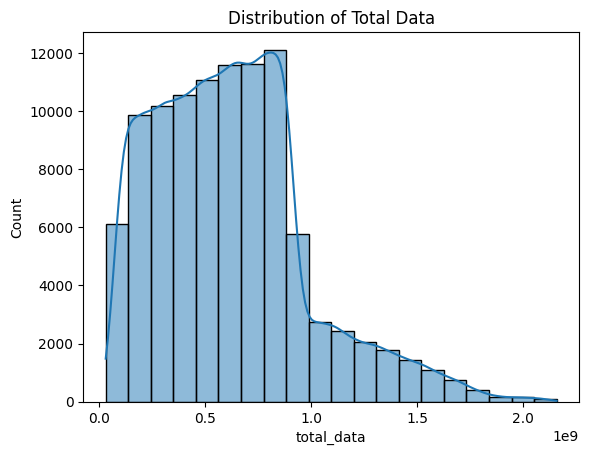

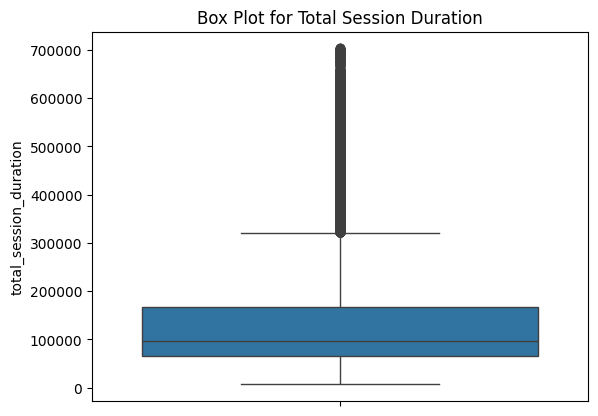

In [29]:
import matplotlib.pyplot as plt
import seaborn as sns

# Histogram for total data
sns.histplot(data['total_data'], bins=20, kde=True)
plt.title("Distribution of Total Data")
plt.show()

# Box Plot for total session duration
sns.boxplot(data=data['total_session_duration'])
plt.title("Box Plot for Total Session Duration")
plt.show()


### Bivariate Analysis
#### Relationship Between Applications and Total Data

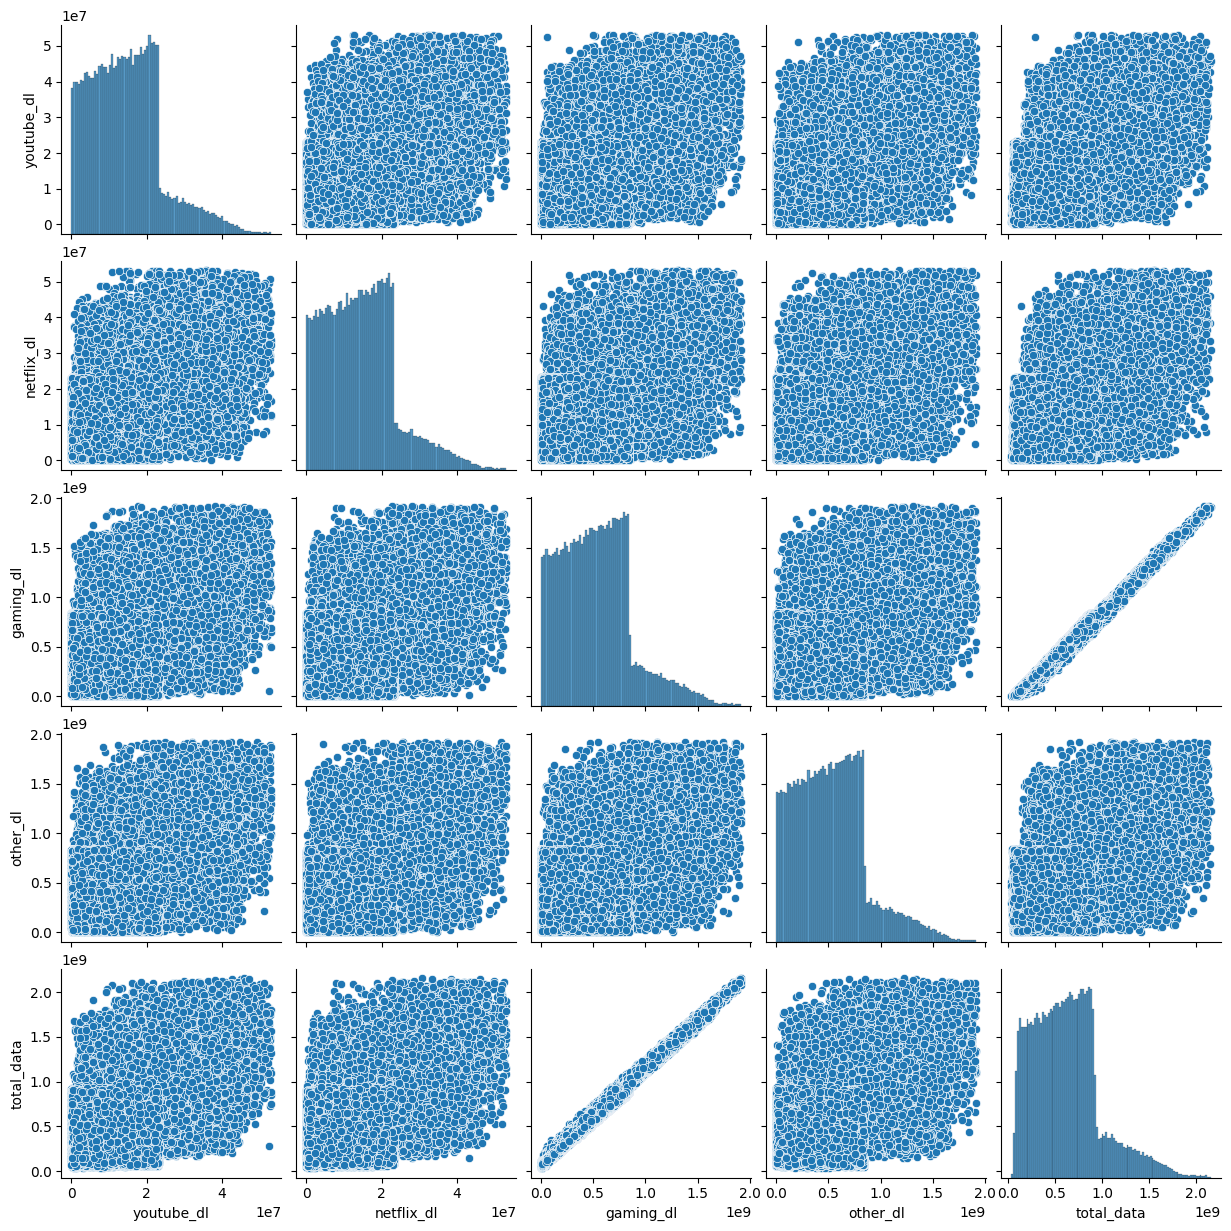

            youtube_dl  netflix_dl  gaming_dl  other_dl  total_data
youtube_dl    1.000000    0.358613   0.355725  0.360389    0.408971
netflix_dl    0.358613    1.000000   0.355896  0.354864    0.409179
gaming_dl     0.355725    0.355896   1.000000  0.354808    0.995760
other_dl      0.360389    0.354864   0.354808  1.000000    0.391357
total_data    0.408971    0.409179   0.995760  0.391357    1.000000


In [30]:
# Pairplot for applications vs. total data
app_columns = ['youtube_dl', 'netflix_dl', 'gaming_dl', 'other_dl']
sns.pairplot(data, vars=app_columns + ['total_data'])
plt.show()

# Correlation with total data
correlations = data[app_columns + ['total_data']].corr()
print(correlations)


### Correlation Analysis
#### Correlation Matrix

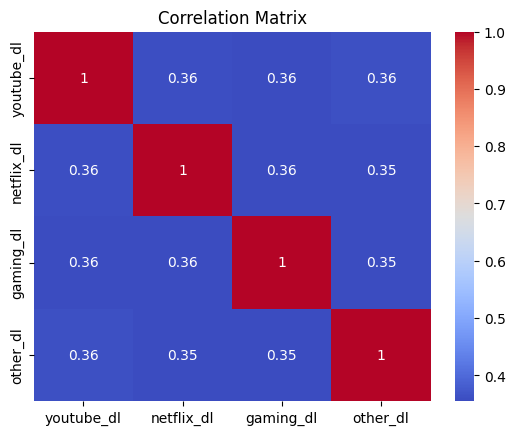

In [39]:
variables = ['social_media_dl', 'google_dl', 'email_dl', 
             'youtube_dl', 'netflix_dl', 'gaming_dl', 'other_dl']

variables = ['youtube_dl', 'netflix_dl', 'gaming_dl', 'other_dl']

correlation_matrix = data[variables].corr()

sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm")
plt.title("Correlation Matrix")
plt.show()


### Dimensionality Reduction
#### Principal Component Analysis (PCA)

In [40]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Standardize the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data[variables])

# Perform PCA
pca = PCA(n_components=2)
pca_result = pca.fit_transform(scaled_data)

# Explained variance
print("Explained Variance Ratio:", pca.explained_variance_ratio_)


Explained Variance Ratio: [0.51753844 0.16168309]


### My excpected slides concepts 

Dataset overview and variable descriptions. <br>
Missing value and outlier handling.<br>
Key descriptive statistics.<br>
Segmentation results (decile classes).<br>
Key plots and interpretations.<br>
Bivariate and correlation findings.<br>
PCA results and their significance.<br>

In [41]:
df.head()

Bearer Id            Start  Start ms              End  End ms  \
0  1.311448e+19   4/4/2019 12:01     770.0  4/25/2019 14:35   662.0   
1  1.311448e+19   4/9/2019 13:04     235.0   4/25/2019 8:15   606.0   
2  1.311448e+19   4/9/2019 17:42       1.0  4/25/2019 11:58   652.0   
3  1.311448e+19   4/10/2019 0:31     486.0   4/25/2019 7:36   171.0   
4  1.311448e+19  4/12/2019 20:10     565.0  4/25/2019 10:40   954.0   

   Dur. (ms)          IMSI  MSISDN/Number          IMEI  \
0  1823652.0  2.082014e+14   3.366496e+10  3.552121e+13   
1  1365104.0  2.082019e+14   3.368185e+10  3.579401e+13   
2  1361762.0  2.082003e+14   3.376063e+10  3.528151e+13   
3  1321509.0  2.082014e+14   3.375034e+10  3.535661e+13   
4  1089009.0  2.082014e+14   3.369980e+10  3.540701e+13   

      Last Location Name  ...  Youtube DL (Bytes)  Youtube UL (Bytes)  \
0  9.16456699548519E+015  ...          15854611.0           2501332.0   
1                L77566A  ...          20247395.0          19111729.0   
2                D42335A  ...          19725661.0          14699576.0   
3                T21824A  ...          21388122.0          15146643.0   
4                D88865A  ...          15259380.0          18962873.0   

   Netflix DL (Bytes)  Netflix UL (Bytes)  Gaming DL (Bytes)  \
0           8198936.0           9656251.0        278082303.0   
1          18338413.0          17227132.0        608750074.0   
2          17587794.0           6163408.0        229584621.0   
3          13994646.0           1097942.0        799538153.0   
4          17124581.0            415218.0        527707248.0   

   Gaming UL (Bytes)  Other DL (Bytes)  Other UL (Bytes)  Total UL (Bytes)  \
0         14344150.0       171744450.0         8814393.0        36749741.0   
1          1170709.0       526904238.0        15055145.0        53800391.0   
2           395630.0       410692588.0         4215763.0        27883638.0   
3         10849722.0       749039933.0        12797283.0        43324218.0   
4          3529801.0       550709500.0        13910322.0        38542814.0   

   Total DL (Bytes)  
0       308879636.0  
1       653384965.0  
2       279807335.0  
3       846028530.0  
4       569138589.0  

[5 rows x 55 columns]

## 2. Task 2 - User Engagement Analysis

In [43]:
# Convert time columns to datetime
df['Start'] = pd.to_datetime(df['Start'])
df['End'] = pd.to_datetime(df['End'])

# Calculate session frequency for each Bearer Id
session_frequency = df.groupby('Bearer Id').size().reset_index(name='Session Frequency')

# Calculate session duration (already in Dur. (ms))
df['Session Duration (seconds)'] = df['Dur. (ms)'] / 1000

# Calculate total traffic for each session
df['Total Traffic (Bytes)'] = df['Total DL (Bytes)'] + df['Total UL (Bytes)']

# Aggregate metrics for each Bearer Id
engagement_metrics = df.groupby('Bearer Id').agg({
    'Session Duration (seconds)': 'sum',  # Total session duration
    'Total Traffic (Bytes)': 'sum',  # Total traffic
    'Start': 'count'  # Session frequency
}).rename(columns={'Start': 'Session Frequency'}).reset_index()

# Display results
engagement_metrics

Bearer Id  Session Duration (seconds)  Total Traffic (Bytes)  \
0       6.917538e+18                      24.534            542426609.0   
1       6.917538e+18                      21.489            748242861.0   
2       6.917538e+18                      27.786            870014786.0   
3       6.917538e+18                      15.635            875392198.0   
4       6.917538e+18                      24.264            646941226.0   
...              ...                         ...                    ...   
134703  1.318654e+19                      80.024            180705804.0   
134704  1.318654e+19                     145.291            423191221.0   
134705  1.318654e+19                      86.399            908608252.0   
134706  1.318654e+19                      86.399            427232744.0   
134707  1.318654e+19                     103.113            373360399.0   

        Session Frequency  
0                       1  
1                       1  
2                       1  
3                       1  
4                       1  
...                   ...  
134703                  1  
134704                  1  
134705                  1  
134706                  1  
134707                  1  

[134708 rows x 4 columns]

### Aggregate Metrics per Customer (MSISDN)

In [45]:
# Aggregate metrics per customer (MSISDN/Number)
customer_metrics = df.groupby('MSISDN/Number').agg({
    'Session Duration (seconds)': 'sum',
    'Total Traffic (Bytes)': 'sum',
    'Bearer Id': 'count'
}).rename(columns={
    'Session Duration (seconds)': 'Total Session Duration (seconds)',
    'Total Traffic (Bytes)': 'Total Traffic (Bytes)',
    'Bearer Id': 'Session Frequency'
}).reset_index()

# Top 10 customers per engagement metric
top_10_duration = customer_metrics.nlargest(10, 'Total Session Duration (seconds)')
top_10_traffic = customer_metrics.nlargest(10, 'Total Traffic (Bytes)')
top_10_frequency = customer_metrics.nlargest(10, 'Session Frequency')

# Display results
print("Top 10 customers by session duration:")
print(top_10_duration)

print("\nTop 10 customers by total traffic:")
print(top_10_traffic)

print("\nTop 10 customers by session frequency:")
print(top_10_frequency)


Top 10 customers by session duration:
       MSISDN/Number  Total Session Duration (seconds)  Total Traffic (Bytes)  \
13180   3.362578e+10                         18553.754           8.499621e+09   
6437    3.361489e+10                          9966.898           8.846226e+09   
92923   3.376054e+10                          9279.434           8.514774e+09   
13526   3.362632e+10                          8791.927           7.971167e+09   
65118   3.366716e+10                          8744.914           5.618394e+09   
50281   3.366284e+10                          6614.270           4.000098e+09   
57160   3.366469e+10                          6288.730           5.682007e+09   
666     3.360313e+10                          6287.761           4.976195e+09   
66029   3.366746e+10                          5649.882           2.600522e+09   
92577   3.376041e+10                          5321.667           7.132371e+09   

       Session Frequency  
13180                 17  
6437            

### Normalize Metrics and Apply K-Means Clustering (k=3)

In [46]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
import numpy as np

# Normalize the metrics
scaler = MinMaxScaler()
normalized_data = scaler.fit_transform(customer_metrics[['Total Session Duration (seconds)', 'Total Traffic (Bytes)', 'Session Frequency']])

# Run k-means with k=3
kmeans = KMeans(n_clusters=3, random_state=42)
customer_metrics['Cluster'] = kmeans.fit_predict(normalized_data)

# Add normalized metrics for reference
normalized_df = pd.DataFrame(normalized_data, columns=['Normalized Duration', 'Normalized Traffic', 'Normalized Frequency'])
customer_metrics = pd.concat([customer_metrics, normalized_df], axis=1)

# Display cluster assignments
print(customer_metrics.head())


   MSISDN/Number  Total Session Duration (seconds)  Total Traffic (Bytes)  \
0   3.360100e+10                           116.720           8.786906e+08   
1   3.360100e+10                           181.230           1.568596e+08   
2   3.360100e+10                           134.969           5.959665e+08   
3   3.360101e+10                            49.878           4.223207e+08   
4   3.360101e+10                            37.104           1.457411e+09   

   Session Frequency  Cluster  Normalized Duration  Normalized Traffic  \
0                  1        2             0.005908            0.095931   
1                  1        2             0.009387            0.014026   
2                  1        2             0.006892            0.063851   
3                  1        2             0.002304            0.044148   
4                  2        0             0.001615            0.161598   

   Normalized Frequency  
0              0.055556  
1              0.055556  
2             

### Compute Stats for Each Cluster

In [47]:
cluster_stats = customer_metrics.groupby('Cluster').agg({
    'Total Session Duration (seconds)': ['min', 'max', 'mean', 'sum'],
    'Total Traffic (Bytes)': ['min', 'max', 'mean', 'sum'],
    'Session Frequency': ['min', 'max', 'mean', 'sum']
}).reset_index()

print("Cluster statistics:")
print(cluster_stats)


Cluster statistics:
  Cluster Total Session Duration (seconds)                         \
                                       min        max        mean   
0       0                           18.235   3174.824  215.100806   
1       1                           49.323  18553.754  572.159112   
2       2                            7.142   1573.420  107.473681   

               Total Traffic (Bytes)                              \
           sum                   min           max          mean   
0  4551317.959          2.842182e+08  1.915933e+09  1.138979e+09   
1  2286919.971          1.085994e+09  8.846226e+09  2.294204e+09   
2  8780599.726          3.324901e+07  1.427100e+09  4.964976e+08   

                Session Frequency                       
            sum               min max      mean    sum  
0  2.409966e+13                 1   4  2.184791  46228  
1  9.169934e+12                 3  18  4.258194  17020  
2  4.056385e+13                 0   2  1.043550  85258  


### Aggregate Traffic per Application

In [48]:
# Aggregate user total traffic per application
app_traffic = df.groupby('MSISDN/Number').agg({
    'Youtube DL (Bytes)': 'sum',
    'Youtube UL (Bytes)': 'sum',
    'Netflix DL (Bytes)': 'sum',
    'Netflix UL (Bytes)': 'sum',
    'Gaming DL (Bytes)': 'sum',
    'Gaming UL (Bytes)': 'sum',
    'Other DL (Bytes)': 'sum',
    'Other UL (Bytes)': 'sum'
}).reset_index()

# Derive the total traffic per application
app_traffic['Youtube Traffic'] = app_traffic['Youtube DL (Bytes)'] + app_traffic['Youtube UL (Bytes)']
app_traffic['Netflix Traffic'] = app_traffic['Netflix DL (Bytes)'] + app_traffic['Netflix UL (Bytes)']
app_traffic['Gaming Traffic'] = app_traffic['Gaming DL (Bytes)'] + app_traffic['Gaming UL (Bytes)']

# Top 10 most engaged users per application
top_youtube = app_traffic.nlargest(10, 'Youtube Traffic')
top_netflix = app_traffic.nlargest(10, 'Netflix Traffic')
top_gaming = app_traffic.nlargest(10, 'Gaming Traffic')

print("Top 10 users for YouTube traffic:")
print(top_youtube)

print("\nTop 10 users for Netflix traffic:")
print(top_netflix)

print("\nTop 10 users for Gaming traffic:")
print(top_gaming)


Top 10 users for YouTube traffic:
       MSISDN/Number  Youtube DL (Bytes)  Youtube UL (Bytes)  \
13180   3.362578e+10         237883033.0         215075736.0   
92923   3.376054e+10         194068298.0         202220900.0   
6437    3.361489e+10         199823443.0         194546775.0   
13526   3.362632e+10         164048706.0         210434341.0   
76363   3.367588e+10         158665235.0         158745337.0   
65118   3.366716e+10         141972692.0         173258618.0   
13994   3.362708e+10         187323322.0         121467452.0   
92577   3.376041e+10         174245981.0         128923126.0   
86455   3.369879e+10         166900329.0         135761629.0   
666     3.360313e+10         158976704.0         125113435.0   

       Netflix DL (Bytes)  Netflix UL (Bytes)  Gaming DL (Bytes)  \
13180         193912238.0         163068369.0       7.171884e+09   
92923         146500839.0         188142430.0       7.316364e+09   
6437          179585986.0         181815060.0       7.622

### Plot Top 3 Applications

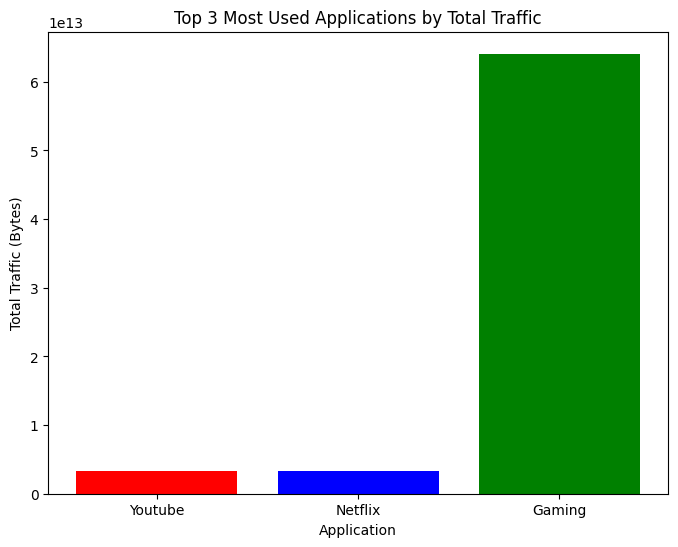

In [49]:
import matplotlib.pyplot as plt

# Aggregate total traffic per application
application_totals = {
    'Youtube': app_traffic['Youtube Traffic'].sum(),
    'Netflix': app_traffic['Netflix Traffic'].sum(),
    'Gaming': app_traffic['Gaming Traffic'].sum()
}

# Plot the data
plt.figure(figsize=(8, 6))
plt.bar(application_totals.keys(), application_totals.values(), color=['red', 'blue', 'green'])
plt.title('Top 3 Most Used Applications by Total Traffic')
plt.ylabel('Total Traffic (Bytes)')
plt.xlabel('Application')
plt.show()


### Optimize k Using the Elbow Method

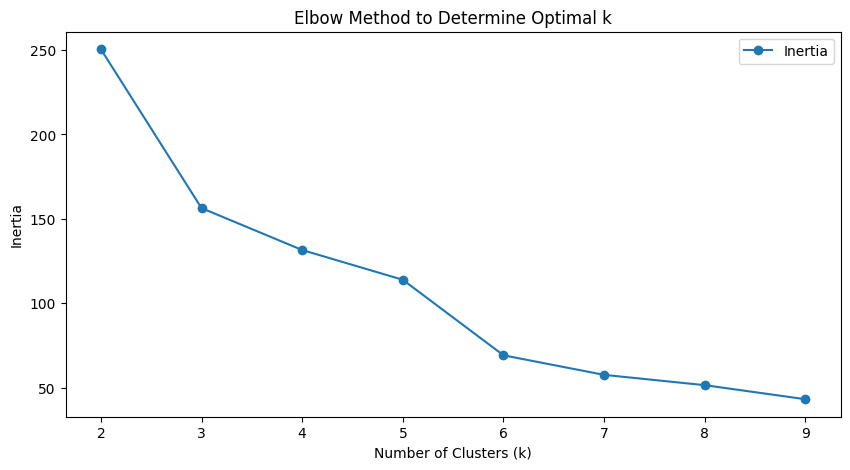

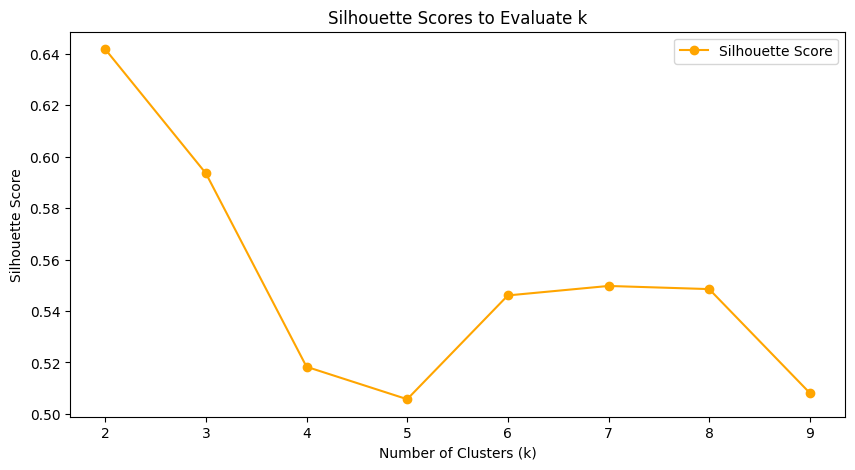

In [50]:
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

# Determine the optimal k
inertia = []
silhouette_scores = []
K = range(2, 10)  # Test k values from 2 to 9

for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(normalized_data)
    inertia.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(normalized_data, kmeans.labels_))

# Plot the elbow curve
plt.figure(figsize=(10, 5))
plt.plot(K, inertia, marker='o', label='Inertia')
plt.title('Elbow Method to Determine Optimal k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.legend()
plt.show()

# Plot the silhouette scores
plt.figure(figsize=(10, 5))
plt.plot(K, silhouette_scores, marker='o', color='orange', label='Silhouette Score')
plt.title('Silhouette Scores to Evaluate k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')
plt.legend()
plt.show()


* Which cluster contains highly engaged users (e.g., highest traffic or duration)?
* How do different engagement levels (low, medium, high) compare across the clusters?
* Which applications contribute the most to engagement?

## 3. Task 3 - Experience Analytics

#### Task 3. 1 - Aggregate, per customer, the following information (treat missing & outliers by replacing with the mean or the mode of the corresponding variable)

In [55]:
df.columns.to_list()

['Bearer Id',
 'Start',
 'Start ms',
 'End',
 'End ms',
 'Dur. (ms)',
 'IMSI',
 'MSISDN/Number',
 'IMEI',
 'Last Location Name',
 'Avg RTT DL (ms)',
 'Avg RTT UL (ms)',
 'Avg Bearer TP DL (kbps)',
 'Avg Bearer TP UL (kbps)',
 'TCP DL Retrans. Vol (Bytes)',
 'TCP UL Retrans. Vol (Bytes)',
 'DL TP < 50 Kbps (%)',
 '50 Kbps < DL TP < 250 Kbps (%)',
 '250 Kbps < DL TP < 1 Mbps (%)',
 'DL TP > 1 Mbps (%)',
 'UL TP < 10 Kbps (%)',
 '10 Kbps < UL TP < 50 Kbps (%)',
 '50 Kbps < UL TP < 300 Kbps (%)',
 'UL TP > 300 Kbps (%)',
 'HTTP DL (Bytes)',
 'HTTP UL (Bytes)',
 'Activity Duration DL (ms)',
 'Activity Duration UL (ms)',
 'Dur. (ms).1',
 'Handset Manufacturer',
 'Handset Type',
 'Nb of sec with 125000B < Vol DL',
 'Nb of sec with 1250B < Vol UL < 6250B',
 'Nb of sec with 31250B < Vol DL < 125000B',
 'Nb of sec with 37500B < Vol UL',
 'Nb of sec with 6250B < Vol DL < 31250B',
 'Nb of sec with 6250B < Vol UL < 37500B',
 'Nb of sec with Vol DL < 6250B',
 'Nb of sec with Vol UL < 1250B',
 'Socia

In [60]:
# Replace missing values
for col in ['TCP DL Retrans. Vol (Bytes)', 'TCP UL Retrans. Vol (Bytes)','Avg RTT DL (ms)', 'Avg RTT UL (ms)', 'Avg Bearer TP DL (kbps)', 'Avg Bearer TP UL (kbps)']:
    if col in df.columns:
        df[col].fillna(df[col].mean(), inplace=True)

# Handle outliers (replace values beyond 3 standard deviations with the mean)
for col in ['TCP DL Retrans. Vol (Bytes)', 'TCP UL Retrans. Vol (Bytes)','Avg RTT DL (ms)', 'Avg RTT UL (ms)', 'Avg Bearer TP DL (kbps)', 'Avg Bearer TP UL (kbps)']:
    if col in df.columns:
        mean = df[col].mean()
        std_dev = df[col].std()
        upper_bound = mean + 3 * std_dev
        lower_bound = mean - 3 * std_dev
        df[col] = np.where((df[col] > upper_bound) | (df[col] < lower_bound), mean, df[col])

# Aggregate metrics per customer (MSISDN)
aggregated_metrics = df.groupby('MSISDN/Number').agg({
    'TCP DL Retrans. Vol (Bytes)':'mean',
    'TCP UL Retrans. Vol (Bytes)': 'mean',
    'Avg RTT DL (ms)': 'mean',  # Average DL RTT
    'Avg RTT UL (ms)': 'mean',  # Average UL RTT
    'Avg Bearer TP DL (kbps)': 'mean',  # Average DL Throughput
    'Avg Bearer TP UL (kbps)': 'mean',  # Average UL Throughput
    'Handset Type': lambda x: x.mode()[0] if not x.mode().empty else None  # Most common handset type
}).reset_index()

# Rename columns for clarity
aggregated_metrics.rename(columns={
    'TCP DL Retrans. Vol (Bytes)':'TCP DL Retrans. Vol (Bytes)',
 'TCP UL Retrans. Vol (Bytes)':'TCP UL Retrans. Vol (Bytes)',
    'Avg RTT DL (ms)': 'Average DL RTT',
    'Avg RTT UL (ms)': 'Average UL RTT',
    'Avg Bearer TP DL (kbps)': 'Average DL Throughput',
    'Avg Bearer TP UL (kbps)': 'Average UL Throughput',
    'Handset Type': 'Most Common Handset Type'
}, inplace=True)

# Display results
print(aggregated_metrics)

# Save to a file if needed
aggregated_metrics.to_csv('aggregated_customer_metrics_task_3.csv', index=False)


C:\Users\Admin\AppData\Local\Temp\ipykernel_10556\2389658413.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].mean(), inplace=True)


        MSISDN/Number  TCP DL Retrans. Vol (Bytes)  \
0        3.360100e+10                 2.080991e+07   
1        3.360100e+10                 2.080991e+07   
2        3.360100e+10                 2.080991e+07   
3        3.360101e+10                 1.066000e+03   
4        3.360101e+10                 1.507977e+07   
...               ...                          ...   
106851   3.379000e+10                 2.150440e+05   
106852   3.379000e+10                 2.080991e+07   
106853   3.197021e+12                 2.080991e+07   
106854   3.370000e+14                 2.080991e+07   
106855   8.823971e+14                 2.080991e+07   

        TCP UL Retrans. Vol (Bytes)  Average DL RTT  Average UL RTT  \
0                     759658.664811       46.000000        0.000000   
1                     759658.664811       30.000000        1.000000   
2                     759658.664811      109.795706       17.662883   
3                     759658.664811       69.000000       15.000000

#### Task 3.2 - Compute & list 10 of the top, bottom, and most frequent

In [61]:
# Function to compute top, bottom, and most frequent values for a column
def compute_metrics(df, column):
    if column in df.columns:
        top_10 = df[column].nlargest(10)
        bottom_10 = df[column].nsmallest(10)
        most_frequent = df[column].value_counts().head(10)
        return top_10, bottom_10, most_frequent
    else:
        return None, None, None

# Columns to analyze
columns_to_analyze = ['TCP DL Retrans. Vol (Bytes)', 'TCP UL Retrans. Vol (Bytes)','Avg RTT DL (ms)', 'Avg RTT UL (ms)', 'Avg Bearer TP DL (kbps)', 'Avg Bearer TP UL (kbps)']

# Loop through columns and compute metrics
results = {}
for col in columns_to_analyze:
    top_10, bottom_10, most_frequent = compute_metrics(df, col)
    results[col] = {
        'Top 10': top_10,
        'Bottom 10': bottom_10,
        'Most Frequent': most_frequent
    }

# Display results
for col, metrics in results.items():
    print(f"Column: {col}")
    print("\nTop 10 Values:")
    print(metrics['Top 10'])
    print("\nBottom 10 Values:")
    print(metrics['Bottom 10'])
    print("\nMost Frequent Values:")
    print(metrics['Most Frequent'])
    print("\n" + "-"*50 + "\n")


Column: TCP DL Retrans. Vol (Bytes)

Top 10 Values:
121394    372356204.0
121428    372210984.0
61577     369958724.0
79891     368643528.0
105577    367686534.0
42541     366414808.0
37794     366148436.0
781       365950245.0
61162     363955072.0
61548     363750572.0
Name: TCP DL Retrans. Vol (Bytes), dtype: float64

Bottom 10 Values:
59708     2.0
125088    2.0
2818      4.0
39582     4.0
52480     4.0
60366     4.0
60417     4.0
75082     4.0
100305    4.0
143429    4.0
Name: TCP DL Retrans. Vol (Bytes), dtype: float64

Most Frequent Values:
TCP DL Retrans. Vol (Bytes)
2.080991e+07    88146
2.080991e+07      538
1.330000e+03      433
2.660000e+03      219
3.800000e+01      200
9.200000e+01      192
1.318000e+03      156
5.430000e+02      133
3.990000e+03      114
7.600000e+01      108
Name: count, dtype: int64

--------------------------------------------------

Column: TCP UL Retrans. Vol (Bytes)

Top 10 Values:
36877     47821286.0
141292    47288459.0
37227     47206844.0
4054

### Task 3.3 - Compute & report

In [ ]:
['TCP DL Retrans. Vol (Bytes)', 'TCP UL Retrans. Vol (Bytes)',
 'Avg RTT DL (ms)', 'Avg RTT UL (ms)', 'Avg Bearer TP DL (kbps)', 
 'Avg Bearer TP UL (kbps)']

In [ ]:
# 1. Group by Handset Type and Compute Metrics
handset_metrics = df.groupby('Handset Type').agg({
    'Throughput': 'mean',
    'TCP retransmission': 'mean'
}).rename(columns={
    'Throughput': 'Average Throughput',
    'TCP retransmission': 'Average TCP Retransmission'
}).reset_index()

# 2. Sort values for better visualization
handset_metrics_sorted_throughput = handset_metrics.sort_values('Average Throughput', ascending=False)
handset_metrics_sorted_tcp = handset_metrics.sort_values('Average TCP Retransmission', ascending=False)

# 3. Plot the Distribution of Average Throughput per Handset Type
plt.figure(figsize=(12, 6))
plt.bar(handset_metrics_sorted_throughput['Handset type'], handset_metrics_sorted_throughput['Average Throughput'], color='blue')
plt.title('Distribution of Average Throughput per Handset Type')
plt.xlabel('Handset Type')
plt.ylabel('Average Throughput (Mbps)')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

# 4. Plot the Average TCP Retransmission per Handset Type
plt.figure(figsize=(12, 6))
plt.bar(handset_metrics_sorted_tcp['Handset type'], handset_metrics_sorted_tcp['Average TCP Retransmission'], color='green')
plt.title('Average TCP Retransmission per Handset Type')
plt.xlabel('Handset Type')
plt.ylabel('Average TCP Retransmission (Ratio)')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

# 5. Display results
print("Average Throughput per Handset Type:")
print(handset_metrics_sorted_throughput)

print("\nAverage TCP Retransmission per Handset Type:")
print(handset_metrics_sorted_tcp)

#### Task 3.4 - Using the experience metrics above, perform a k-means clustering (where k = 3) to segment users into groups of experiences and provide a brief description of each cluster. (The description must define each group based on your understanding of the data)

In [ ]:
# Select relevant metrics
data = handset_metrics[['Average Throughput', 'Average TCP Retransmission']]

# Normalize the data
scaler = StandardScaler()
normalized_data = scaler.fit_transform(data)

# Perform K-Means clustering
kmeans = KMeans(n_clusters=3, random_state=42)
clusters = kmeans.fit_predict(normalized_data)

# Add cluster labels to the original data
handset_metrics['Cluster'] = clusters

# Compute average metrics per cluster
cluster_summary = handset_metrics.groupby('Cluster').agg({
    'Average Throughput': ['mean', 'min', 'max'],
    'Average TCP Retransmission': ['mean', 'min', 'max']
}).reset_index()

# Rename columns for clarity
cluster_summary.columns = ['Cluster', 
                           'Avg Throughput Mean', 'Avg Throughput Min', 'Avg Throughput Max', 
                           'Avg TCP Retr Mean', 'Avg TCP Retr Min', 'Avg TCP Retr Max']

# Print cluster summary
print(cluster_summary)

# Visualize the clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(
    x='Average Throughput', 
    y='Average TCP Retransmission', 
    hue='Cluster', 
    data=handset_metrics, 
    palette='Set1'
)
plt.title('K-Means Clustering of User Experience')
plt.xlabel('Average Throughput')
plt.ylabel('Average TCP Retransmission')
plt.legend(title='Cluster')
plt.show()

# 4. Task 4  - Satisfaction Analysis


#### Task 4.1  - Write a Python program to assign:

In [ ]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from scipy.spatial.distance import cdist

# Load dataset (ensure your dataset is loaded correctly)
# Replace 'your_dataset.csv' with your actual data source
# df = pd.read_csv('your_dataset.csv')

# Select relevant metrics for engagement and experience
metrics = ['Average Throughput', 'Average TCP Retransmission']
data = df[metrics]

# Normalize the data for clustering
scaler = StandardScaler()
normalized_data = scaler.fit_transform(data)

# Perform K-Means clustering with k=3
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(normalized_data)
df['Cluster'] = kmeans.labels_

# Identify the least engaged and worst experience clusters
cluster_centers = kmeans.cluster_centers_

# Engagement score: Identify the least engaged cluster (lowest throughput, highest retransmission)
least_engaged_cluster_idx = np.argmax(cluster_centers[:, 1])  # Highest retransmission
least_engaged_center = cluster_centers[least_engaged_cluster_idx]

# Experience score: Identify the worst experience cluster (lowest throughput, highest retransmission)
worst_experience_cluster_idx = np.argmax(cluster_centers[:, 1])  # Highest retransmission
worst_experience_center = cluster_centers[worst_experience_cluster_idx]

# Compute Engagement Score (distance to least engaged cluster)
def calculate_distance(row, center):
    return np.linalg.norm(row - center)

normalized_data_df = pd.DataFrame(normalized_data, columns=metrics)

df['Engagement Score'] = normalized_data_df.apply(lambda x: calculate_distance(x, least_engaged_center), axis=1)

# Compute Experience Score (distance to worst experience cluster)
df['Experience Score'] = normalized_data_df.apply(lambda x: calculate_distance(x, worst_experience_center), axis=1)

# Output results
output_columns = ['Average Throughput', 'Average TCP Retransmission', 'Cluster', 'Engagement Score', 'Experience Score']
result_df = df[output_columns]

# Save to a CSV for review
result_df.to_csv('user_engagement_experience_scores.csv', index=False)

# Display top rows
print(result_df.head())


#### Task 4.2 - Consider the average of both engagement & experience scores as  the satisfaction score & report the top 10 satisfied customer 

In [ ]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from scipy.spatial.distance import cdist

# Load dataset (ensure your dataset is loaded correctly)
# Replace 'your_dataset.csv' with your actual data source
df = pd.read_csv('your_dataset.csv')

# Select relevant metrics for engagement and experience
metrics = ['Average Throughput', 'Average TCP Retransmission']
data = df[metrics]

# Normalize the data for clustering
scaler = StandardScaler()
normalized_data = scaler.fit_transform(data)

# Perform K-Means clustering with k=3
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(normalized_data)
df['Cluster'] = kmeans.labels_

# Identify the least engaged and worst experience clusters
cluster_centers = kmeans.cluster_centers_

# Engagement score: Identify the least engaged cluster (lowest throughput, highest retransmission)
least_engaged_cluster_idx = np.argmax(cluster_centers[:, 1])  # Highest retransmission
least_engaged_center = cluster_centers[least_engaged_cluster_idx]

# Experience score: Identify the worst experience cluster (lowest throughput, highest retransmission)
worst_experience_cluster_idx = np.argmax(cluster_centers[:, 1])  # Highest retransmission
worst_experience_center = cluster_centers[worst_experience_cluster_idx]

# Compute Engagement Score (distance to least engaged cluster)
def calculate_distance(row, center):
    return np.linalg.norm(row - center)

normalized_data_df = pd.DataFrame(normalized_data, columns=metrics)

df['Engagement Score'] = normalized_data_df.apply(lambda x: calculate_distance(x, least_engaged_center), axis=1)

# Compute Experience Score (distance to worst experience cluster)
df['Experience Score'] = normalized_data_df.apply(lambda x: calculate_distance(x, worst_experience_center), axis=1)

# Compute Satisfaction Score (average of Engagement and Experience Scores)
df['Satisfaction Score'] = (df['Engagement Score'] + df['Experience Score']) / 2

# Find the top 10 satisfied customers
top_10_satisfied = df.nlargest(10, 'Satisfaction Score')

# Output results
output_columns = ['Average Throughput', 'Average TCP Retransmission', 'Cluster', 'Engagement Score', 'Experience Score', 'Satisfaction Score']
result_df = df[output_columns]

# Save to a CSV for review
result_df.to_csv('user_engagement_experience_scores.csv', index=False)
top_10_satisfied.to_csv('top_10_satisfied_customers.csv', index=False)

# Display top satisfied customers
print("Top 10 Satisfied Customers:")
print(top_10_satisfied)


In [62]:
df.head()

Bearer Id               Start  Start ms                 End  End ms  \
0  1.311448e+19 2019-04-04 12:01:00     770.0 2019-04-25 14:35:00   662.0   
1  1.311448e+19 2019-04-09 13:04:00     235.0 2019-04-25 08:15:00   606.0   
2  1.311448e+19 2019-04-09 17:42:00       1.0 2019-04-25 11:58:00   652.0   
3  1.311448e+19 2019-04-10 00:31:00     486.0 2019-04-25 07:36:00   171.0   
4  1.311448e+19 2019-04-12 20:10:00     565.0 2019-04-25 10:40:00   954.0   

   Dur. (ms)          IMSI  MSISDN/Number          IMEI  \
0  1823652.0  2.082014e+14   3.366496e+10  3.552121e+13   
1  1365104.0  2.082019e+14   3.368185e+10  3.579401e+13   
2  1361762.0  2.082003e+14   3.376063e+10  3.528151e+13   
3  1321509.0  2.082014e+14   3.375034e+10  3.535661e+13   
4  1089009.0  2.082014e+14   3.369980e+10  3.540701e+13   

      Last Location Name  ...  Netflix DL (Bytes)  Netflix UL (Bytes)  \
0  9.16456699548519E+015  ...           8198936.0           9656251.0   
1                L77566A  ...          18338413.0          17227132.0   
2                D42335A  ...          17587794.0           6163408.0   
3                T21824A  ...          13994646.0           1097942.0   
4                D88865A  ...          17124581.0            415218.0   

   Gaming DL (Bytes)  Gaming UL (Bytes)  Other DL (Bytes)  Other UL (Bytes)  \
0        278082303.0         14344150.0       171744450.0         8814393.0   
1        608750074.0          1170709.0       526904238.0        15055145.0   
2        229584621.0           395630.0       410692588.0         4215763.0   
3        799538153.0         10849722.0       749039933.0        12797283.0   
4        527707248.0          3529801.0       550709500.0        13910322.0   

   Total UL (Bytes)  Total DL (Bytes)  Session Duration (seconds)  \
0        36749741.0       308879636.0                    1823.652   
1        53800391.0       653384965.0                    1365.104   
2        27883638.0       279807335.0                    1361.762   
3        43324218.0       846028530.0                    1321.509   
4        38542814.0       569138589.0                    1089.009   

   Total Traffic (Bytes)  
0            345629377.0  
1            707185356.0  
2            307690973.0  
3            889352748.0  
4            607681403.0  

[5 rows x 57 columns]

#### Task 4.3 - Build a regression model of your choice to predict the satisfaction score of a customer

#### Task 4.4 - Run a k-means (k=2) on the engagement & the experience score

#### Task 4.5  - Aggregate the average satisfaction & experience score per cluster

#### Task 4.6 - Export your final table containing all user ID + engagement, experience & satisfaction scores in your local MySQL database. Report a screenshot of a select query output on the exported table